# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
import matplotlib.pyplot as plt
import seaborn.apionly as sns
sns.set_palette('deep')
from IPython.display import display # Allows the use of display() for DataFrames
%config InlineBackend.figure_format = 'retina'

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# DONE: Select three indices of your choice you wish to sample from the dataset
indices = [29,411,319]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,43088,2100,2609,1200,1107,823
1,2126,3289,3281,1535,235,4365
2,9759,25071,17645,1128,12408,1625


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Let's go through all three samples.

*Sample 1.* As we see, `Fresh` category count is 3.6 times more than the mean. Regarding this category, the value is located in the third quartile (quite a lot), but the count for other categories is considerably below the average. We can conclude that this customer specializes on fresh food trading and a good instance of such an establishment is a **organic food supermarket**.

*Sample 2.* In this sample, `Delicatessen` value is above the average. All other categories (except for `Detergents_Paper`) show values in the first quartile, thus we conclude this is probably a **restaurant**.

*Sample 3.* Here we see `Milk`, `Grocery` and `Detergents_Paper` have above mean values (third or fourth quartile of their corresponding distributions). This is quite a lot and such an establishment can represent a **large retail store**.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.cross_validation import train_test_split


# DONE: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Milk', axis=1)
y = data.Milk

# DONE: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=.25, random_state=20160605)

# DONE: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=20160605)
regressor.fit(X_train, y_train)

# DONE: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

In [5]:
score

0.5242946762085281

In [6]:
regressor.feature_importances_

array([ 0.01729579,  0.52256306,  0.04906274,  0.29740102,  0.11367739])

In [7]:
X_train.columns.values

array(['Fresh', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'], dtype=object)

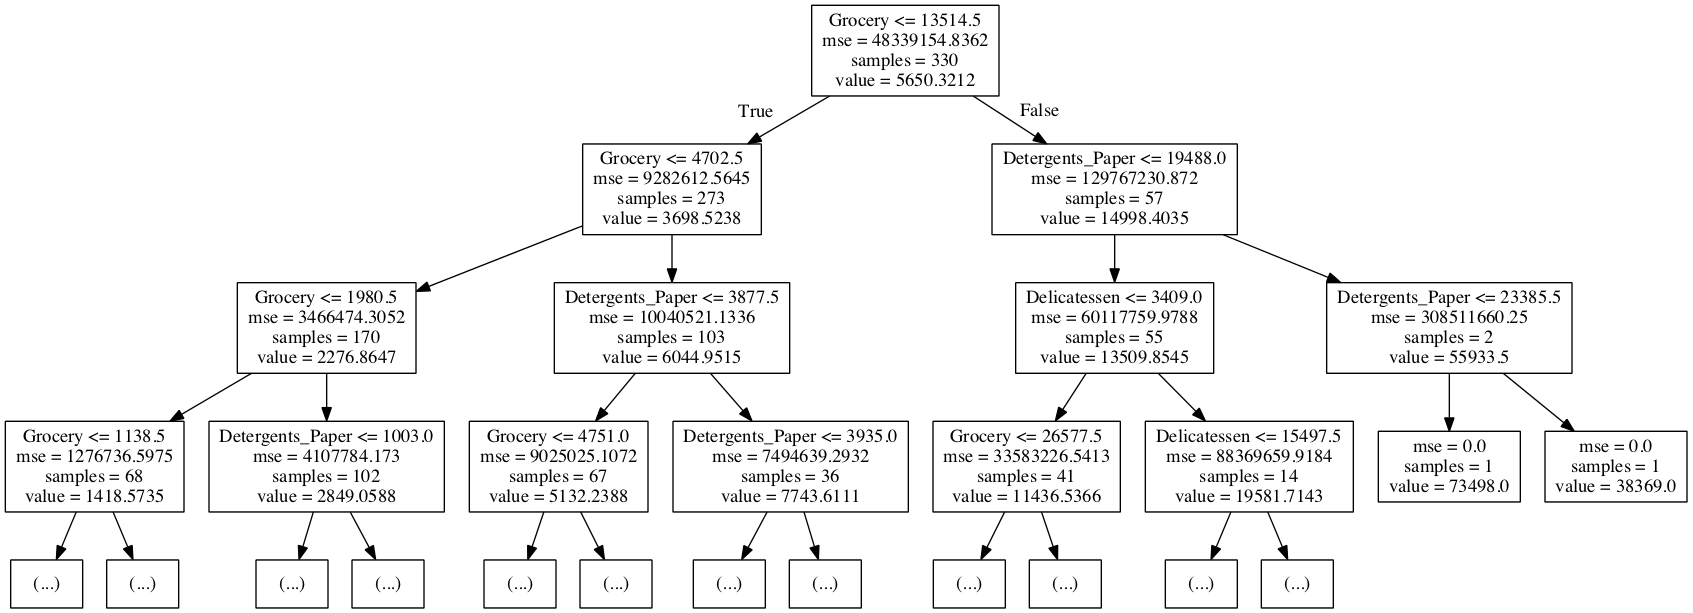

In [8]:
from StringIO import StringIO
try:
    import graphviz
    import pydot
    from IPython.display import Image
    dot_data = StringIO() 

    export_graphviz(regressor, feature_names=X_train.columns.values, out_file=dot_data, max_depth=3)
    graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

    display(Image(graph.create_png()))
except ImportError:
    print "ERROR: You need to install graphviz and pydot modules in order to generate the decision tree visualization."

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I attempted to predict `Milk` and the decision tree managed to fit it with $R^{2}$ score `0.5243`, showing this feature can be approximated (to some extent) with other features.

As we see, the most similar feature to `Milk` is `Grocery` ($R^{2} = 0.523$) followed by `Detergents_Paper` ($R^{2} = 0.297$). This is quite reasonable: all three features describe items sold in supermarkets.

Although this feature can be approximated with other features, I'd still consider it essential. There are two reasons:

1. $R^{2} = 0.5243$ means we lose a lot of variance if we drop `Milk`. I'd have considered dropping our feature if r-squared had been above 0.8 or even 0.9.

2. We have a small dataset both in terms of training examples and features. Since we don't have an abundance of data, every piece of information is very important and should be used.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


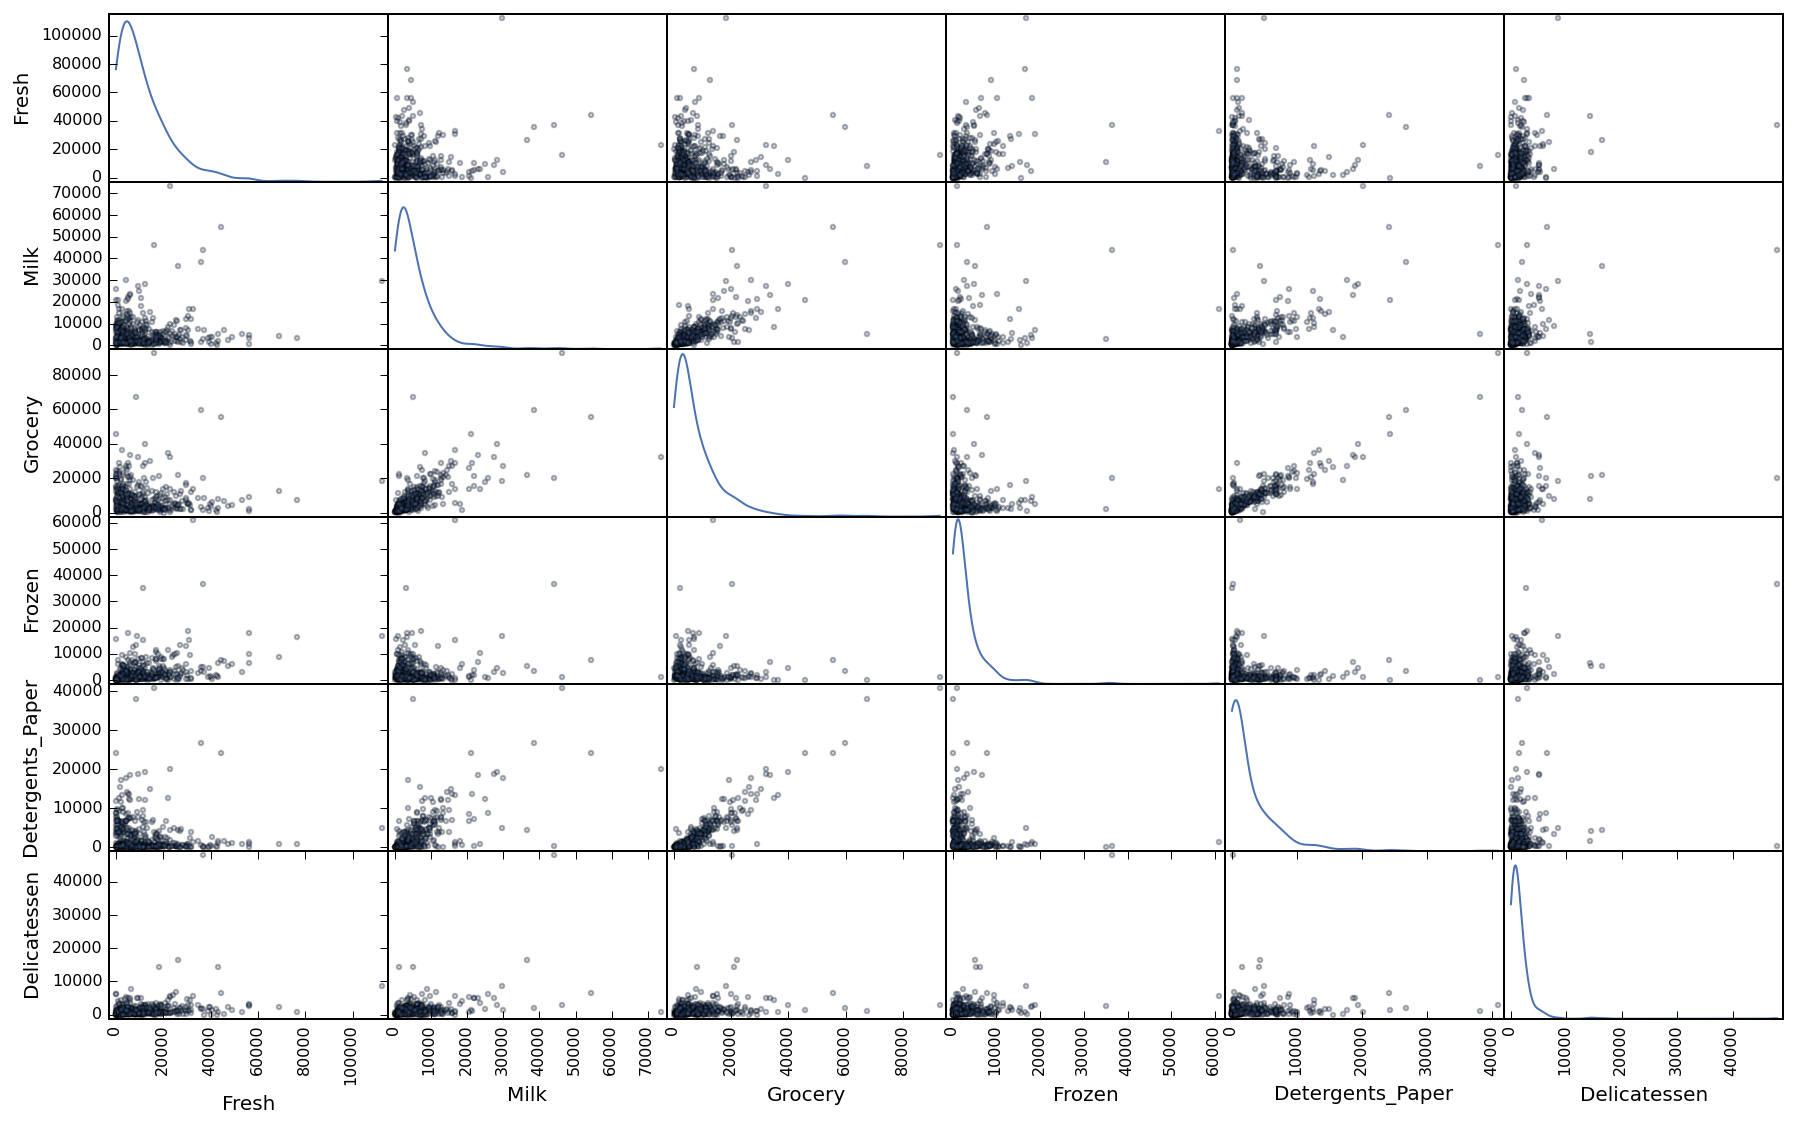

In [9]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (15,9), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

On a diagonal axis of the scatter matrix above we see a histogram, but I'd like to redraw it for a better focus. 

50 bins are probably enough to see whether the data is normally distributed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d6d8550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fd2bc90>]], dtype=object)

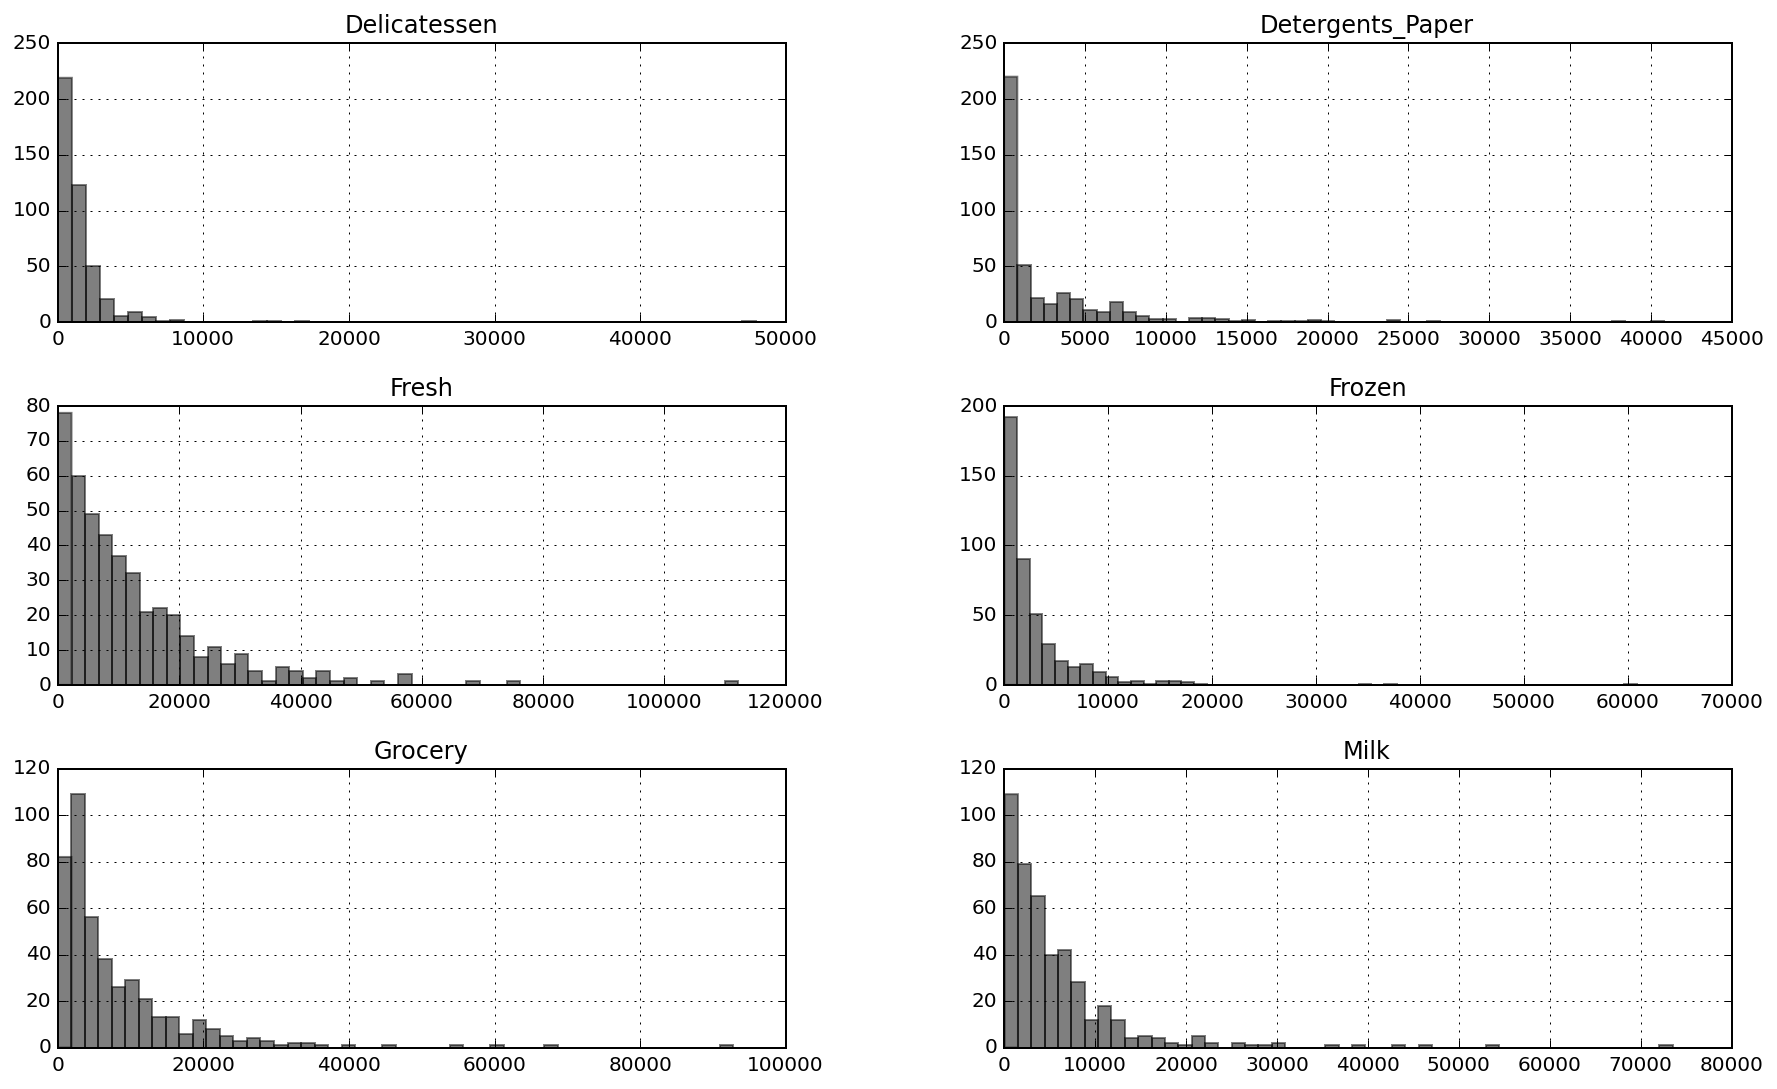

In [10]:
data.hist(color='k', alpha=0.5, bins=50, figsize=(15,9))

Comparing our results with PDF (probability density function) of the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), we see the data is not normally distributed. The data is not bell-shaped and most of the samples tend to be located on the left side of the histogram.

We could also run formal normality tests (e.g. the Shapiro-Wilk normality test), but I don't see reasons for this as the histograms provide enough insights and intuition for our research.

What we can do is to calculate exact correlation values for our features using Pearson correlation coefficient. Pearson's correlation measures the linear relationship between two variables and it does not assume normality of these variables -- it should work for us.

As we see from the scatter matrix, the most correlated features are `Detergents_Paper` and `Groceries`:

In [11]:
from scipy.stats import pearsonr

pearsonr(data.Detergents_Paper, data.Grocery)

(0.9246406908542677, 9.5581550412869146e-186)

We see the $r=0.925$, which is a very high correlation score, $r \in \left [ -1,1 \right ]$. We also see that p-value is basically 0, which means our results are statistically significant as $p \ll 0.05$.

This means we may try to remove `Detergents_Paper` and use `Grocery` instead. We are not going to do this as we'd like to keep the variance associated with `Detergents_Paper`.

We can also do the same analysis with the rest of the features:

In [12]:
pearson_data = []
for column_1 in data.columns:
    for column_2 in data.columns:
        row = [column_1, column_2] + list(pearsonr(data[column_1], data[column_2]))
        pearson_data.append(row)
pearson = pd.DataFrame(pearson_data, columns=['feature1', 'feature2', 'r_value', 'p_value'])

In [13]:
pearson = pearson.where(pearson.feature1 != pearson.feature2).dropna()
pearson.sort_values('r_value', ascending=False)

,feature1,feature2,r_value,p_value
26,Detergents_Paper,Grocery,0.924641,9.558155e-186
16,Grocery,Detergents_Paper,0.924641,9.558155e-186
13,Grocery,Milk,0.728335,6.480571e-74
8,Milk,Grocery,0.728335,6.480571e-74
25,Detergents_Paper,Milk,0.661816,8.937476e-57
10,Milk,Detergents_Paper,0.661816,8.937476e-57
31,Delicatessen,Milk,0.406368,6.325813e-19
11,Milk,Delicatessen,0.406368,6.325813e-19
23,Frozen,Delicatessen,0.390947,1.614240e-17
33,Delicatessen,Frozen,0.390947,1.614240e-17


As we see, there are two candidates with a high correlation values:

1. `Grocery` and `Detergents_Paper` (0.92)
2. `Grocery` and `Milk` (0.73)

As I mentioned earlier, I'd be hesistant to eliminate any feature due to the lack of data, but currently, we can try to remove `Detergents_Paper`. Anyway, I keep `Milk` since its $r^{2}=0.73$ is not very high and we lose valuable information if we remove this feature.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

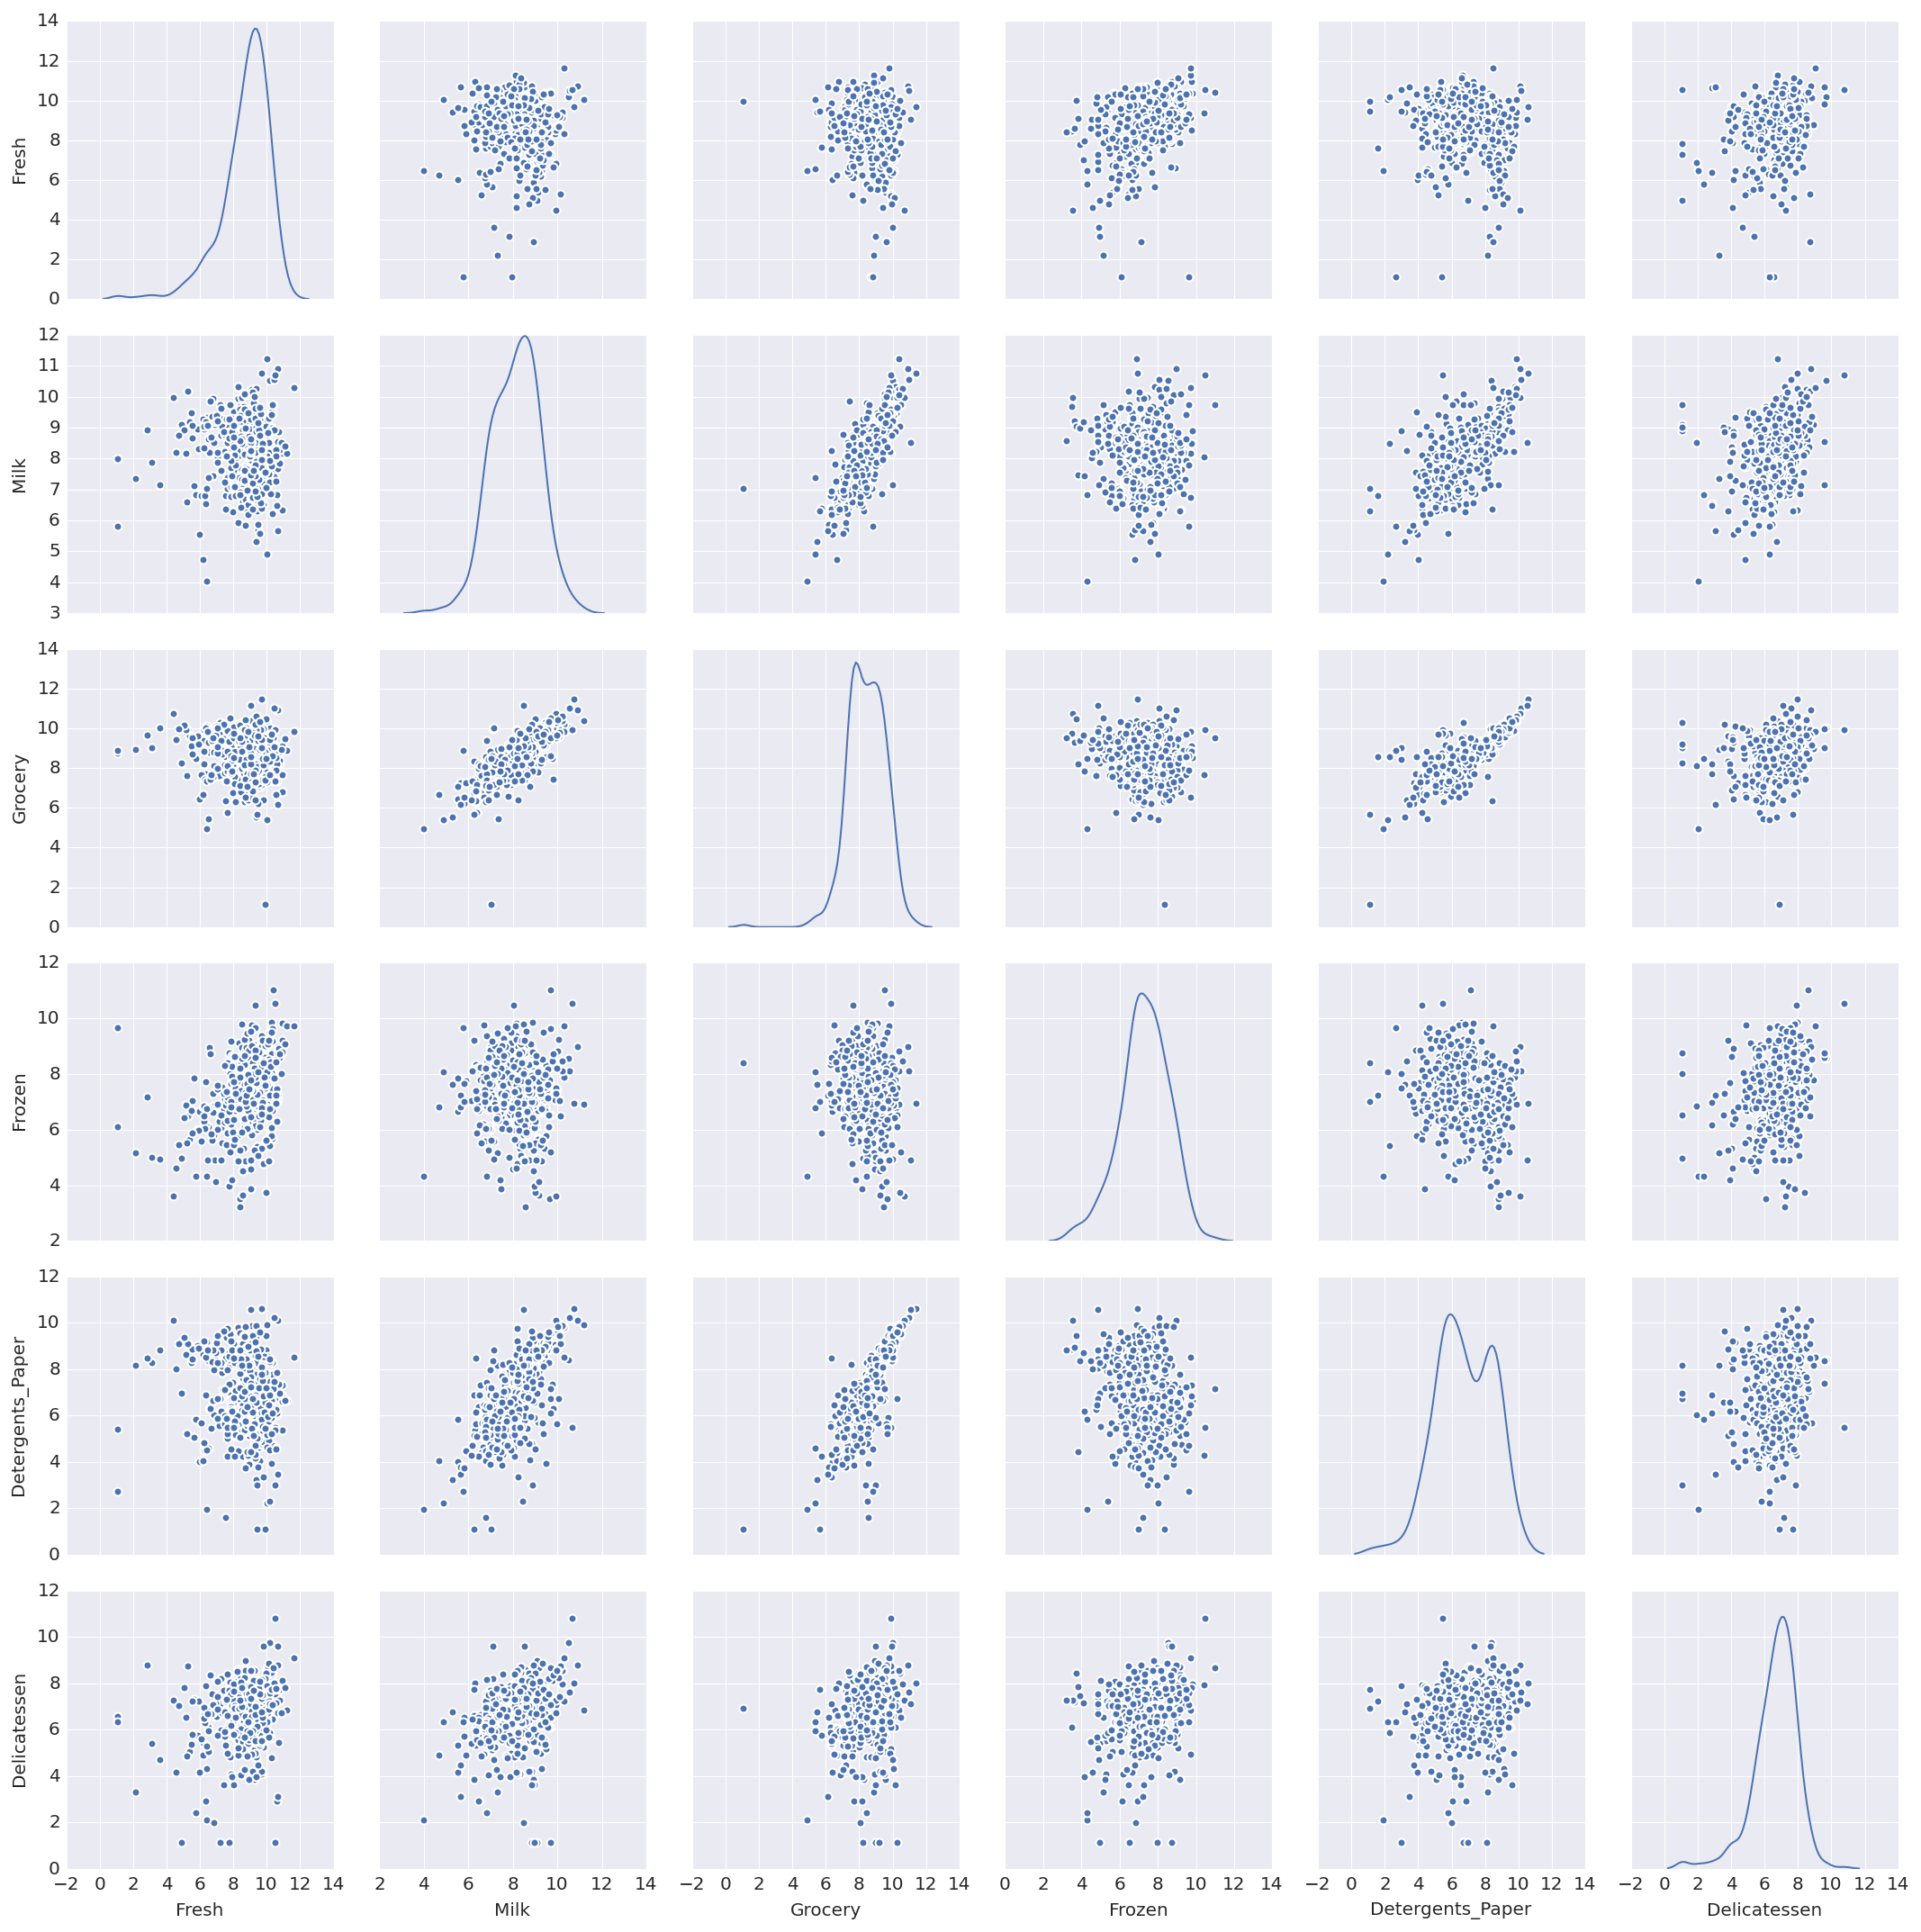

In [14]:
# DONE: Scale the data using the natural logarithm
log_data = np.log(data)

# DONE: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
# pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

# Using seaborn instead (looks much prettier!)
sns.set_style('darkgrid')
sns.pairplot(log_data, diag_kind='kde', palette='dark')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [15]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.671000,7.649693,7.866722,7.090077,7.009409,6.712956
1,7.661998,8.098339,8.095904,7.336286,5.459586,8.381373
2,9.185945,10.129467,9.778208,7.028201,9.426097,7.393263


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [16]:
##### For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # DONE: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # DONE: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # DONE: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [183, 109, 128, 142, 187, 95, 338, 66, 218, 96, 357, 75]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
The answer to this question depends on several considerations:

1. **Our objective is to generalize on data, not to keep everything.** Thus we can and should remove the data points that look like bad outliers. Often models work significantly better with less data, but with such outliers removed. I don't consider all removed data corrupted, but rather too odd to be used by algorithms (e.g. it can move k-means centroids away from the optimal values).

2. **Since we have quite a small dataset, any data removal should be justified and probably made by hand.** Tukey's Method is good for outlier detection, but we should add up some domain knowledge to ensure we eliminated data for a reason. Thus we should cherry pick the worst outliers in our case.

3. **A sample to be removed is not the one which is considered an outlier for more than one feature.** Rather, it's the one with an extreme value (in regard to its mean). Later we are going to cluster the data and such an outlier can make our result considerably worse. In contrast, a moderate deviation in a couple of dimensions won't generally harm our clustering.

Here is the final result, below it is the explanation:

|id|Fresh|Milk|Grocery|Frozen|Detergents_Paper|Delicatessen|
|--|-----|----|-------|------|----------------|------------|
|183|10.514529|10.690808|9.911952|10.505999|5.476464|**10.777768**|
|95|**1.098612**|7.979339|8.740657|6.086775|5.407172|6.563856|
|338|**1.098612**|5.808142|8.856661|9.655090|2.708050|6.309918|
|66|**2.197225**|7.335634|8.911530|5.164786|8.151333|3.295837|
|218|**2.890372**|8.923191|9.629380|7.158514|8.475746|8.759669|
|96|**3.135494**|7.869402|9.001839|4.976734|8.262043|5.379897
|357|**3.610918**|7.150701|10.011086|4.919981|8.816853|4.700480|
|75|9.923192|7.036148|**1.098612**|8.390949|**1.098612**|6.882437|
|109|7.248504|9.724899|10.274568|6.511745|6.728629|**1.098612**|
|128|4.941642|9.087834|8.248791|4.955827|6.967909|**1.098612**|
|142|10.519646|8.875147|9.018332|8.004700|2.995732|**1.098612**|
|187|7.798933|8.987447|9.192075|8.743372|8.148735|**1.098612**|

I took several simple approaches towards outlier elimination:

1. I generated the initial pool of outliers using the Tukey's Method and spent the rest of the time deciding which data point to remove.

2. Looking at the scatter matrix (the one we got after data transformation), I noticed the data distributions are a sort of a mixture of Gaussians. While analyzing histograms, I found regions with a very low probability (I should have put the word "probability" in quotes as the histogram is not a PDF). Those regions are far from the mean and the corresponding samples can be removed from the dataset.

`Delicatessen` outliers were removed with this technique: if we look at its histogram, we see a more or less bell shaped curve and a very low probability of a sample being more than 10 or less than 2. There are 5 points that meet this criteria: `[183, 109, 128, 142, 187]`.

The same logic works for `Fresh` outliers. There is a very low probability that the value of this feature is less than 4. There are 6 point to be removed: `[95, 338, 66, 218, 96, 357]`.

There is one sample to be removed for `Grocery`: `[75]`. It is an outlier for `Detergents_Paper` (remember that `Grocery` and `Detergents_Paper` are highly correlated).

The sample `183` is a very odd as well: it has high values of basically everything. I won't say it is corrupted, but I would definitely remove it anyway. 

There are finally 12 outliers to be removed.

There is a step we could have done — first remove these 12 outliers, then use PCA to reduce the dimensions of data and then **redo the outlier detection process**. This would have removed even more outliers and the final dataset would have been much cleaner.

We could also skip this step now, run a PCA and remove outliers afterwards.

There is one more conclusion I can share: **it is easy to remove outliers if the data distribution is known.** In our case, the histograms of `Delicatessen` and `Fresh` were close to Gaussian PDF which made it easy to spot bad outliers.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

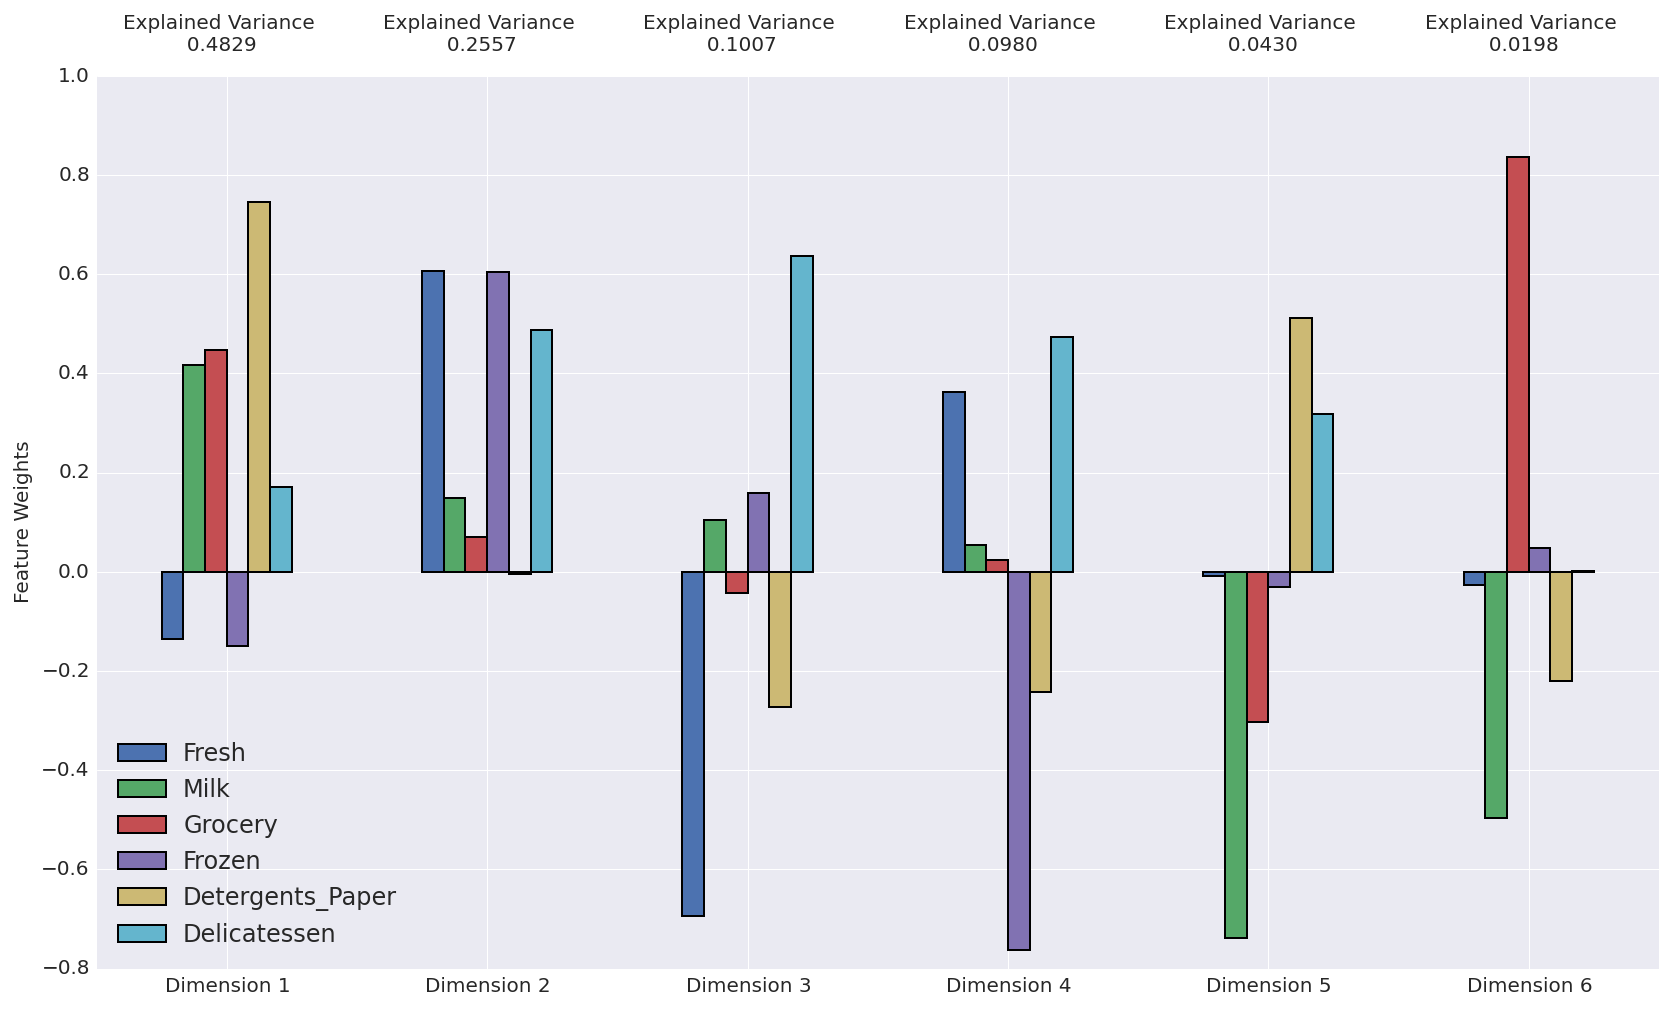

In [17]:
from sklearn.decomposition import PCA

# DONE: Apply PCA to the good data with the same number of dimensions as features
pca = PCA()
pca.fit(good_data)

# DONE: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

As we know, PCA is a nonparametric method that finds the most appropriate basis for a dataset. The idea is that the new basis filters out the noise and reveals hidden properties in data better than the original one. It may also be used as a dimensionality reduction technique since each of the PCs tries to maximize the remaining amount of variance.

First, let's visualize the percentage of variance explained by each PC:

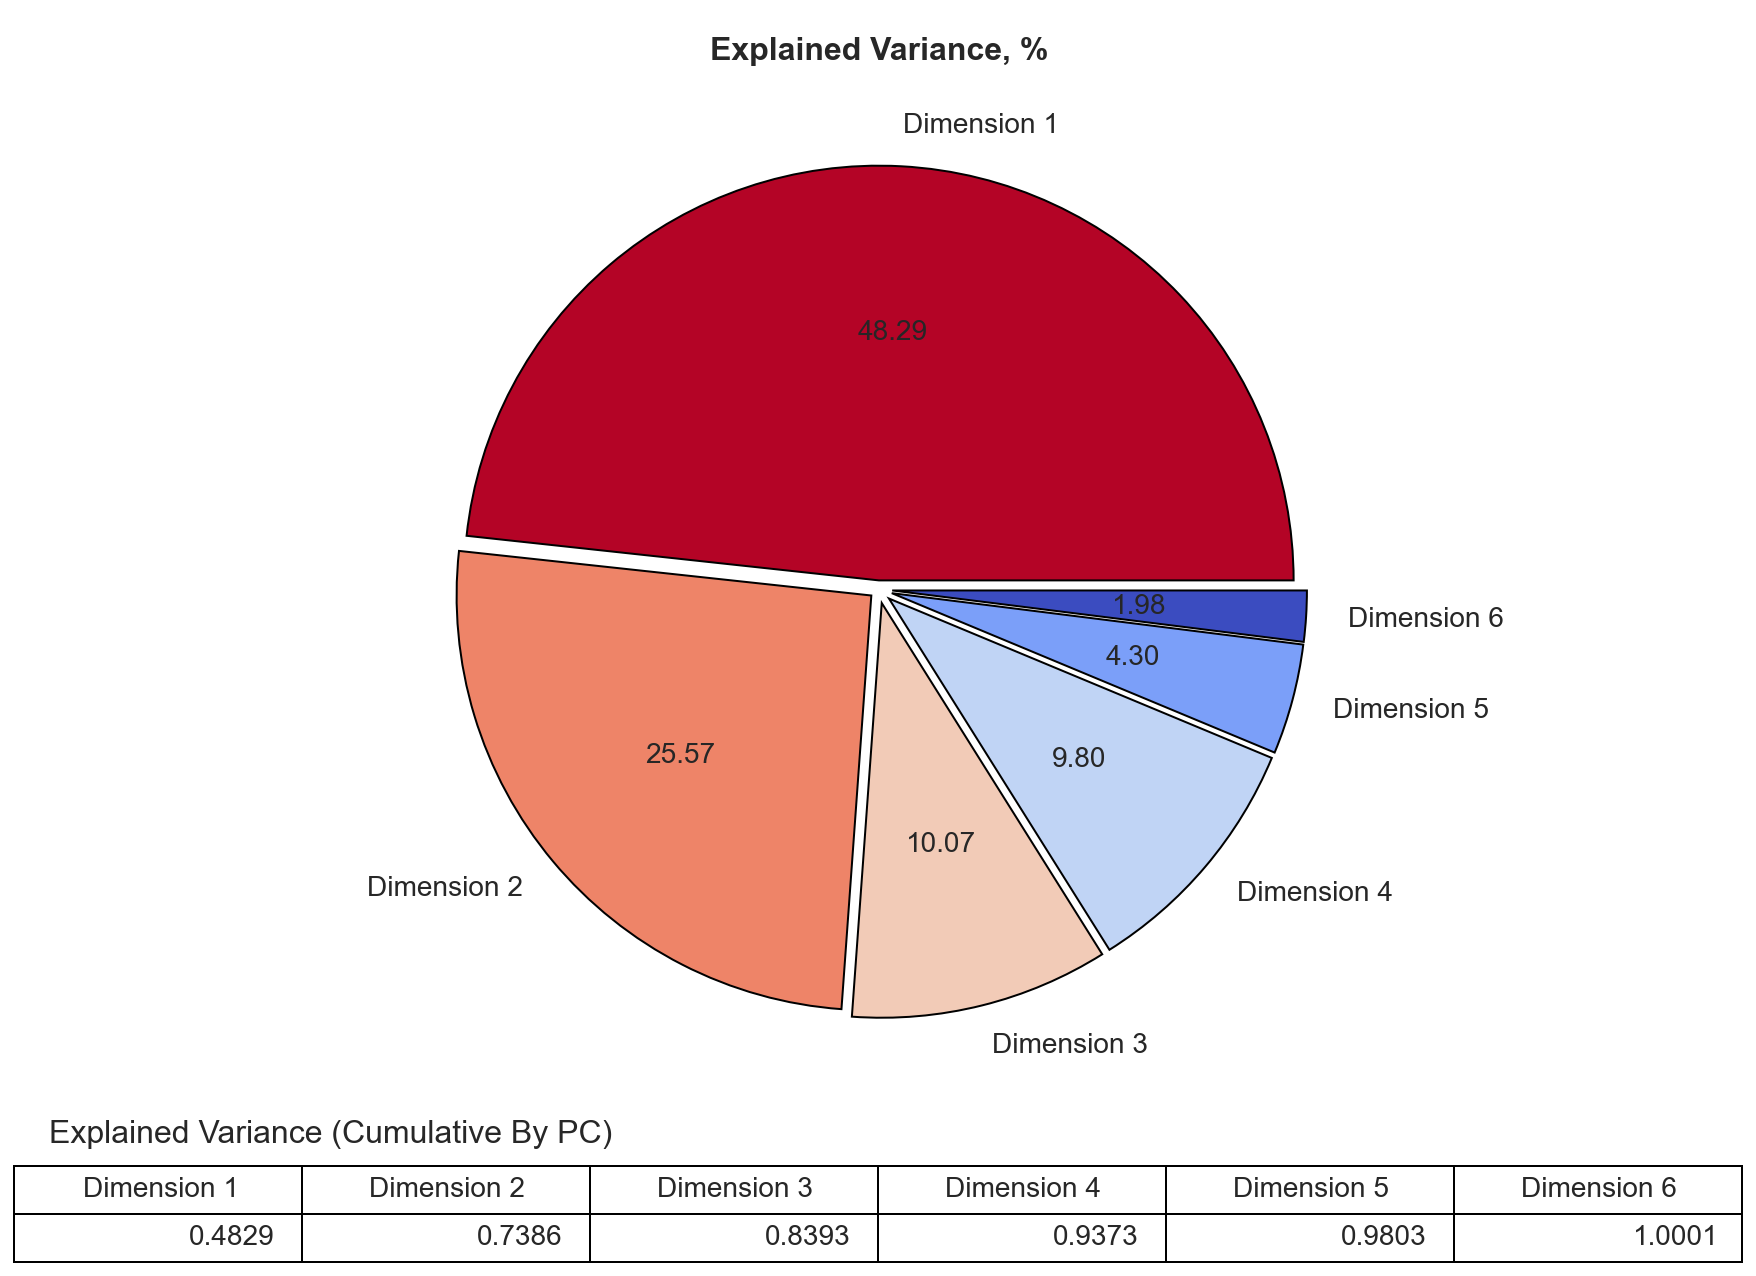

In [18]:
cum_dimensions_sum = pca_results['Explained Variance'].cumsum()

ax = pca_results.plot.pie(y='Explained Variance', figsize=(8,8), cmap='coolwarm_r', legend=None,
                    fontsize=14, autopct='%.2f', explode=[0.02,0.02,0.03,0.03,0.03,0.03], radius=0.9)
ax.yaxis.set_visible(False)
ax.set_position([0,0,1,1])

table = plt.table(cellText=[cum_dimensions_sum.values], colLabels=list(cum_dimensions_sum.keys()), loc='bottom')
plt.text(-1.8,-1.2,'Explained Variance (Cumulative By PC)',size=16)
table.set_fontsize(14)
table.scale(1.5, 2)
plt.suptitle("Explained Variance, %", fontsize=16, fontweight='bold')

The first two principal components (PC) explain `0.4829 + 0.2557 = 0.7386` or **73.9%** of the variance. This is enough to use PC1 and PC2 for data visualization.

The first four PCs explain `0.4829 + 0.2557 + 0.1007 + 0.0980 = 0.937` or **93.7%** of the variance.

Large positive weights for several features in one PC mean that these features are positively correlated. Also, in this case the PC points in a direction in which these features are increasing.

Our components are latent which means they don't "describe" any single feature (e.g. there is no component "responsible" for  describing, say, a customer segment). Nevertheless, we can try to analyze PCs to undertand their meaning from the context.

*First component*. There are three positive weights: `Milk`, `Grocery`, `Detergents_Paper`. They are positively correlated. Actually, we already know this by having our `pearsonr` scores calculated. `Grocery` and `Detergents_Paper` are highly correlated (0.92) as well as the pairs `Grocery-Milk` (0.72) and `Detergents_Paper-Milk` (0.66). There are several observations we can make about this set of features: they are sold in supermarkets, they are not likely to require refrigerators (this PC is negative to the fact of refrigeration).

If the value of this PC is positive, the customer, associated with it, is either a retail store or a warehouse facility, or an another reseller.

The negative `Fresh` and `Frozen` are crucial here. The negative values of PC1 represent companies which purchase these items. These items require special storage conditions, refrigerators and have a short shelf life. The example of such companies can be a restaurant (`Fresh`) or a cafe (`Frozen`).

*Second component*. There are three positive weights: `Fresh`, `Frozen` and `Delicatessen`.  This clarifies even further how much of these items companies buy. High values of this PC correspond with a high volumes of `Fresh`, `Frozen` and `Delicatessen` purchased. This is something that an organic supermarket or a large restaurant can buy.

Also, this PC describes little `Detergents_Paper` and `Grocery`. So PC2 is all about *the quantities* of short shelf life food purchased. Note, this PC may be low for small restaurants or cafes.

The third and the fourth PCs are much harder to interpret, but let's do our best.

*Third component*. The more this PC increases the more `Delicatessen` and `Frozen` increase and `Fresh` decreases. This may be relevant to a seafood markets and seafood restaurants. Another example can be cafes where a lot of products are frozen (cakes, ice cream) and which purchase a good amount of `Delicatessen`.

*Fourth component*. It may capture the fact that a customer is a fast food company. The more this PC increases, the more `Frozen` increases and `Delicatessen` decreases.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [19]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.5146,0.8776,-1.4006,0.7432,0.6116,-0.3501
1,-0.7261,0.1042,2.2499,0.6619,-0.0335,0.0533
2,3.5015,0.7581,-0.4281,0.1706,-0.3274,-0.4792


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [20]:
# DONE: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)

# DONE: Apply a PCA transformation the good data
reduced_data = pca.fit_transform(good_data)

# DONE: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

Let's recalculate the outliers after PCA transformation. We won't drop the following outliers (it is not required by this assignment), but this process is interesting per se and can definitely be used in real life.

In [21]:
outliers_pca = pd.DataFrame()

for feature in reduced_data.keys():
    Q1 = np.percentile(reduced_data[feature], 25)
    Q3 = np.percentile(reduced_data[feature], 75)
    step = 1.5 * (Q3 - Q1)
    outliers_pca = outliers_pca \
                   .append(reduced_data[~((reduced_data[feature] >= Q1 - step) & (reduced_data[feature] <= Q3 + step))])

In [22]:
# How many outliers are there?
len(outliers_pca)

15

Let's build a simple scatter plot to visualize the results of PCA:

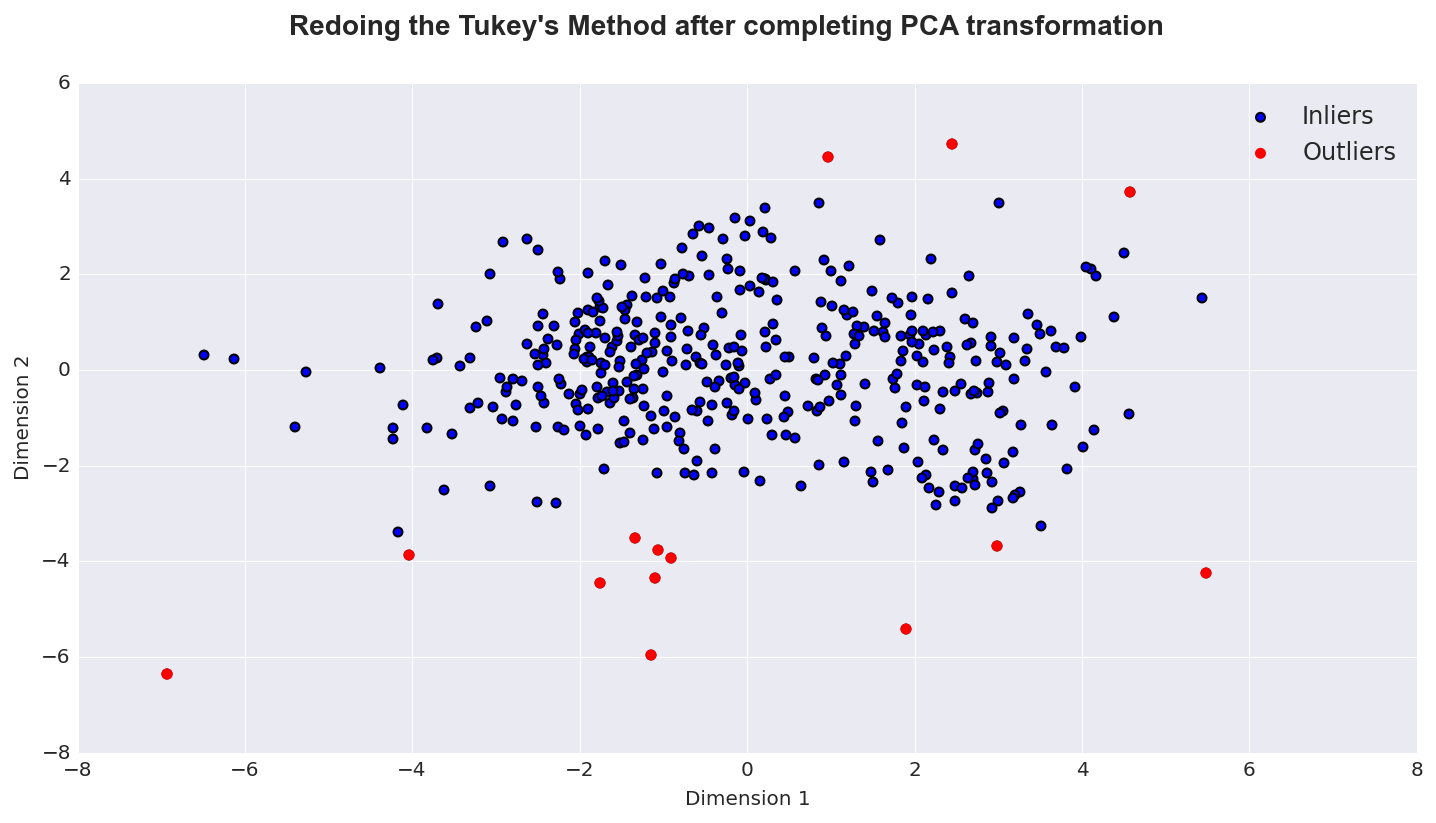

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'])
plt.scatter(outliers_pca['Dimension 1'], outliers_pca['Dimension 2'], color='red')
plt.legend(['Inliers', 'Outliers'])
plt.suptitle("Redoing the Tukey's Method after completing PCA transformation", fontsize=14, fontweight='bold')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [24]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.5146,0.8776
1,-0.7261,0.1042
2,3.5015,0.7581


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

First, I need to notice that these models are similar in a way that they can be derived from the EM algorithm. In this sense, k-means is simpler as it can be understood without digging into the implementation of the EM algorithm. In contrast, GMM is directly derived from EM. GMM takes a probabilistic approach while k-means just takes into account the inertia criterion (or within-cluster sum-of-squares).

Just a couple of words how k-means work.

The cost function we try to optimize is this (adapted from Christopher Bishop [lecture series](http://mlg.eng.cam.ac.uk/tutorials/06/cb.pdf)):

$ J = \sum_{n=1}^{N} \sum_{k=1}^{K}r_{nk} \left \| x_{n}-\mu _{k} \right \|^{2} $

* $r_{nk}$ — responsibilities (assignment of data point $n$ to cluster $k$). Each $r$ is a binary feature: $r_{nk} \in \left \{ 0,1 \right \}$
* $x_{n}$ — our data points
* $\mu _{k}$ — prototypes with respect to each cluster (in other words, the means of k clusters).

Within EM, the minimization of J can be briefly expressed like this:
* E-step: minimize J with respect to $r_{nk}$
* M-step: minimize J with respect to $\mu_{k}$.

In terms of k-means algorithm, we can put it in a different way:
* Assign each sample to the nearest cluster centroid
* Recalculate $\mu_{k}$ (the centroids or the means of k clusters).

And repeat until convergence.

As I mention below, I prefer using k-means due to its simplicity and that's the reason I decided to provide a very short explanation of its workings. I'm not going to do the same with GMM as it is much more sophisticated algorithm and it is not really a purpose of this question.

**The advantages of k-means clustering algorithm:**

- General purpose, easily explainable and well-understood algorithm, good for explanatory data analysis (this is basically what we do in our assignment)
- Very scalable to a large amount of samples and a good number of clusters
- Can be run in parallel to speed up calculations
- Can be modified to run on sampled data (minibatch k-means) which reduces computation time while still optimizing the target function
- Guarantees convergence.

**Disadvantages:**

- Requires clusters to be convex and isotrophic, works poorly on manifolds with irregular shapes. E.g, it works best when the shape of the cluster is more or less circular. In contrast, if two clusters overlap and have ellipsoidal shapes, k-means won't be able to work properly.
- Requires the data to be normalized
- Prone to the local minimum problem, needs to be initialized several time to fix this.

**Gaussian Mixtures. Advantages:**

- Probabalistic model. The model is richer as it utilizes more speicific information comparing to k-means. It uses k-means information _and also_ the covariance matrix of the features, prior probabilities of classes. Without covariance matrix or priors, the model effectively degrades to k-means.
- Soft margins. The points are not really assigned to a specific cluster. Rather, points "prefer" one cluster to others in a probabilistic sense.
- Does not require the clusters to be a specific form. It may work with lot of different shapes and manifolds.

**Disadvantages:**

- Computationally expensive. Specifically, the sum of Gaussians is expensive, though there are several approximations available.
- Harder to understand, requires a sound knowledge of EM algorithm.

**What to use:**

To answer this, let's backtrack to the project objective.

We are assigned to the analysis of why customers may get unsatisfied if the delivery method changes. We decided to cluster our customers based on their purchase history.  As we see, we 

1. Precision is not the key factor in our analysis.
2. The goal is to explore the dataset.
3. The shape of our data is more or less circular. Clusters we may see from dataset should be more or less circular.

Due to this, I'd prefer a simpler model: k-means. I'm sure we can fine tune our clusters using GMM instead, but it looks like an overengineering in this case.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# DONE: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, n_jobs=-1, random_state=20160619)

# DONE: Predict the cluster for each data point
preds = clusterer.fit_predict(reduced_data)

# DONE: Find the cluster centers
centers = clusterer.cluster_centers_

# DONE: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# DONE: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
Let's plot silhouettes for different values of k. We'll see that the best silhouette score is 0.43 which corresponds to the k=2.

This is adapted from the sklearn example on calculating the [silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

('For n_clusters =', 2, 'The average silhouette_score is :', 0.43187814081255949)


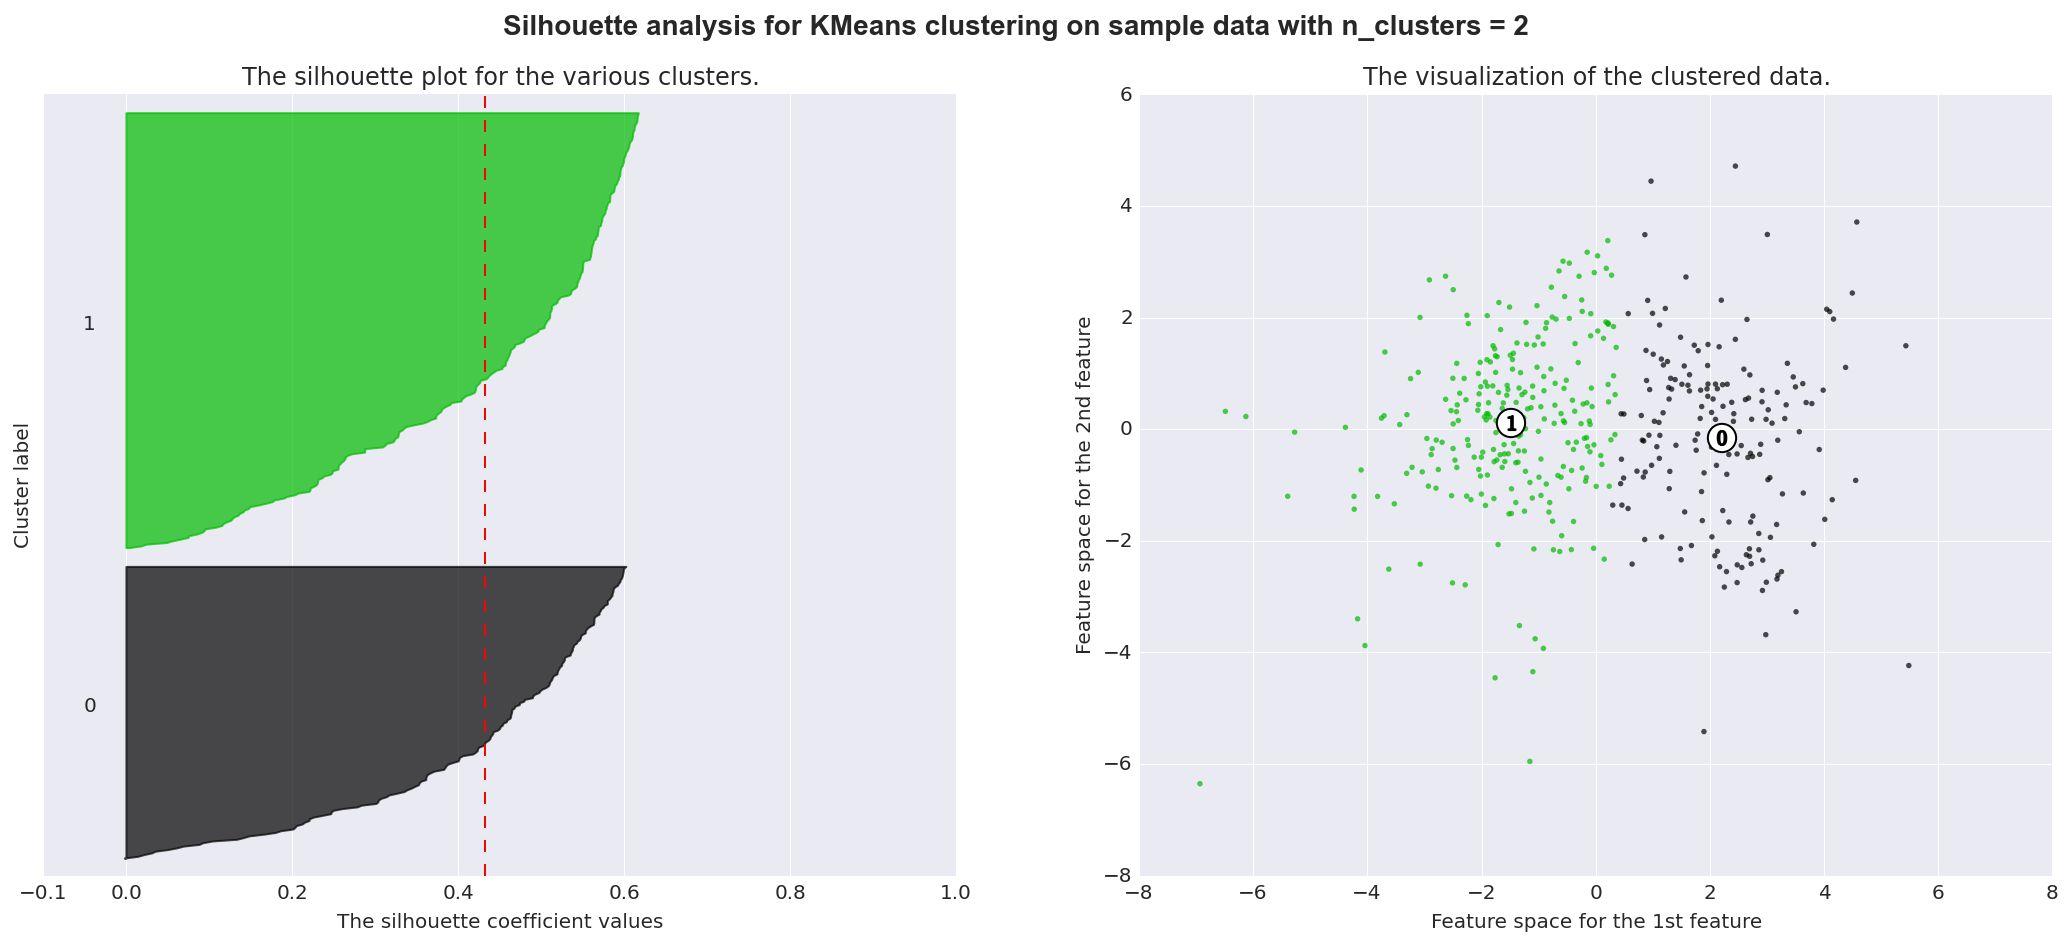

('For n_clusters =', 3, 'The average silhouette_score is :', 0.34142326967444775)


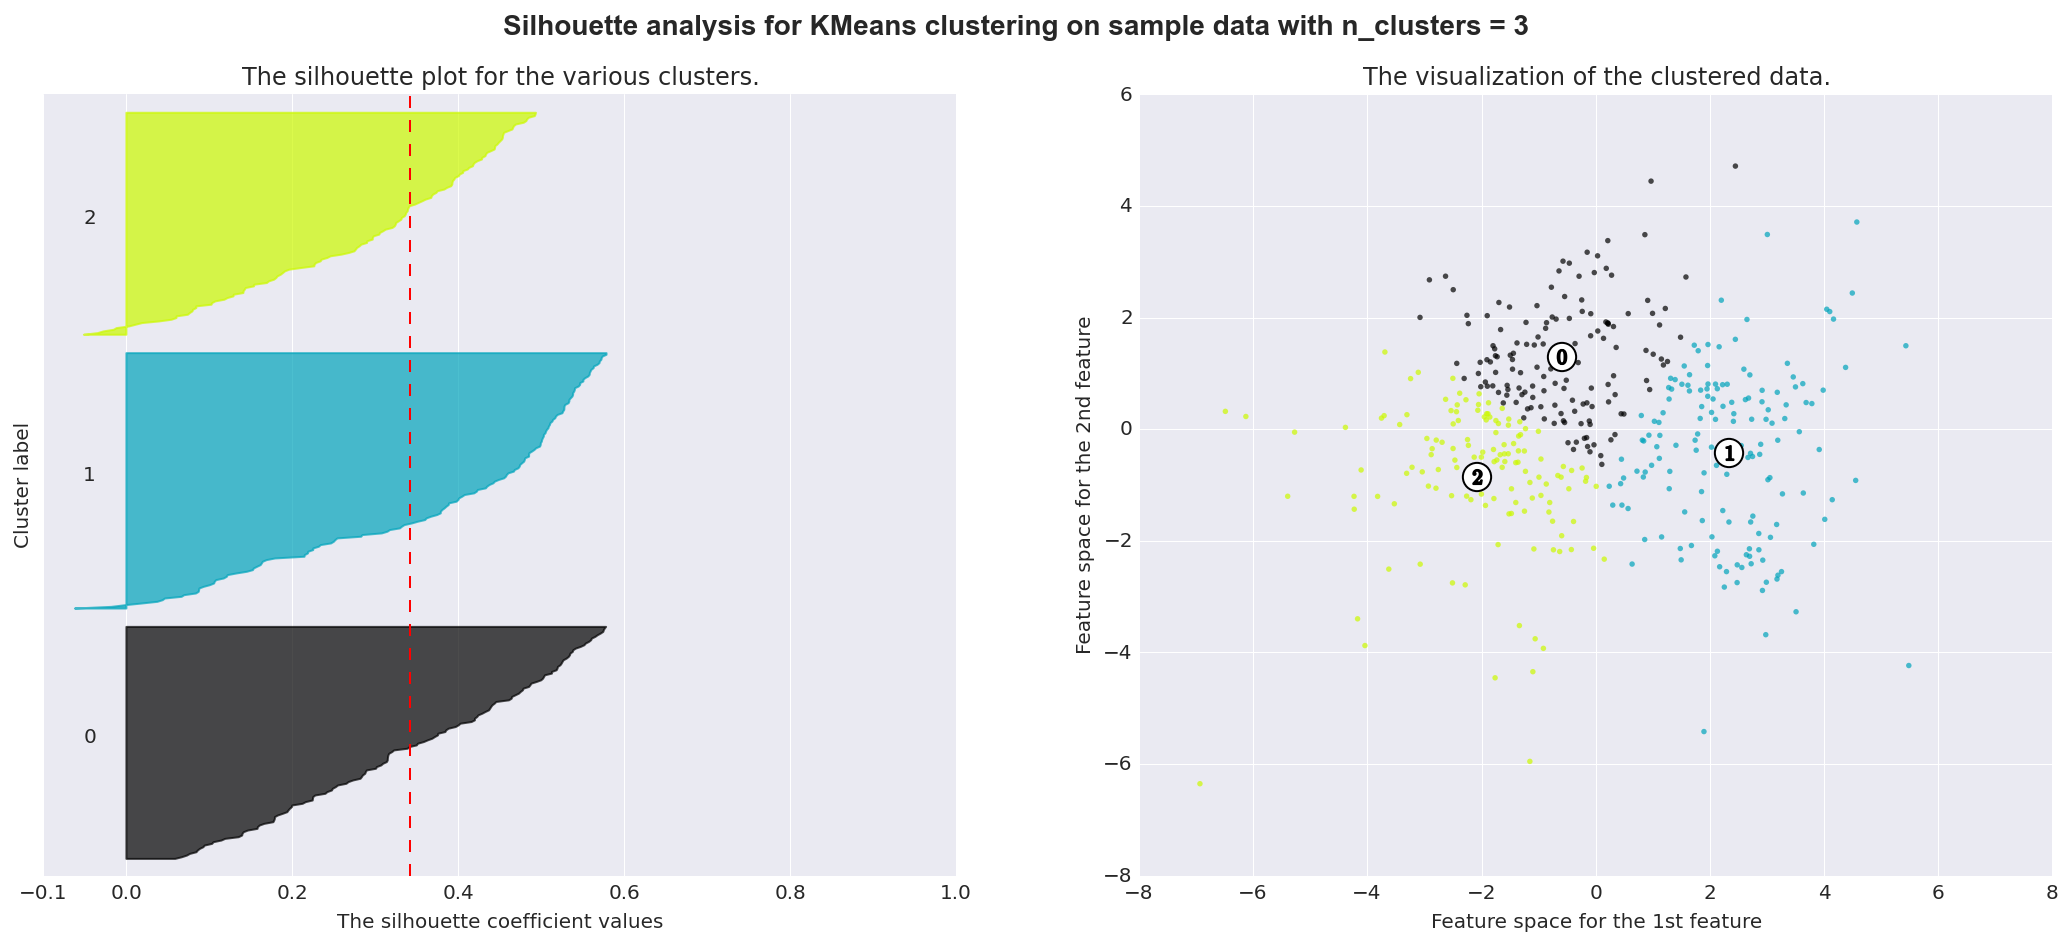

('For n_clusters =', 4, 'The average silhouette_score is :', 0.33515692728616769)


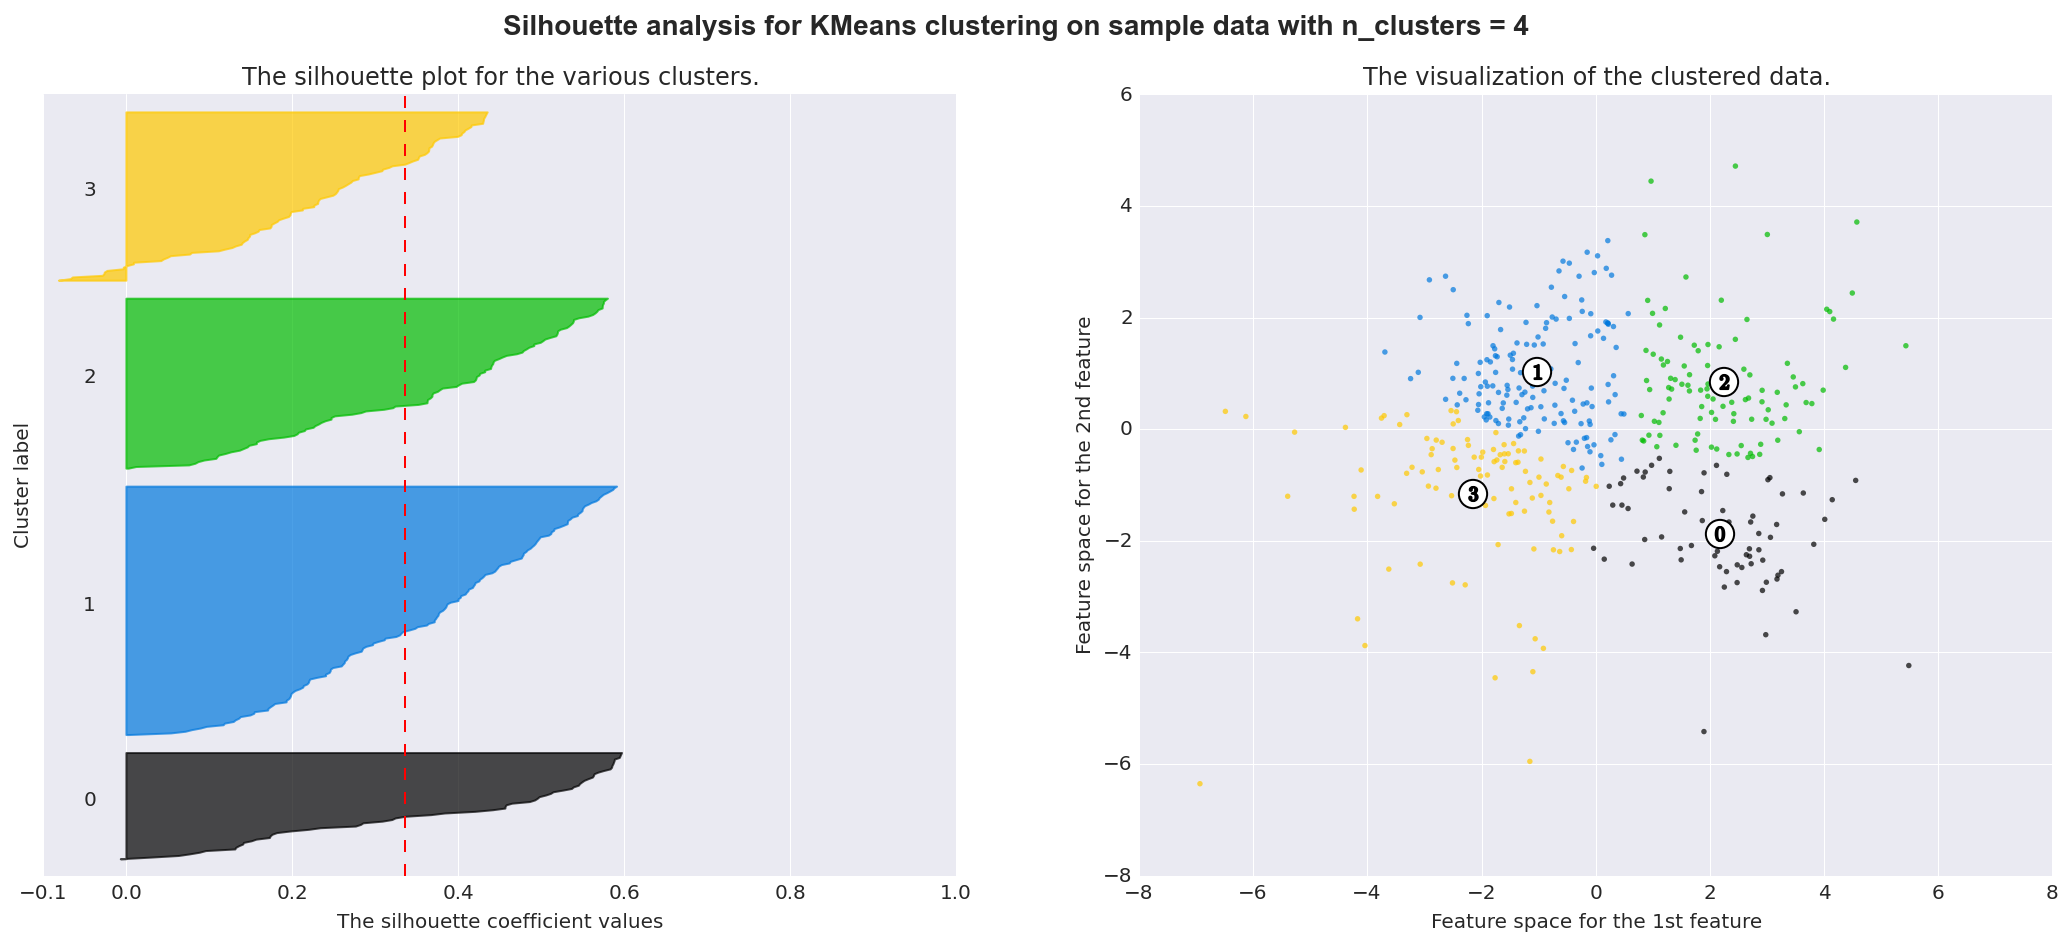

('For n_clusters =', 5, 'The average silhouette_score is :', 0.35039794212327352)


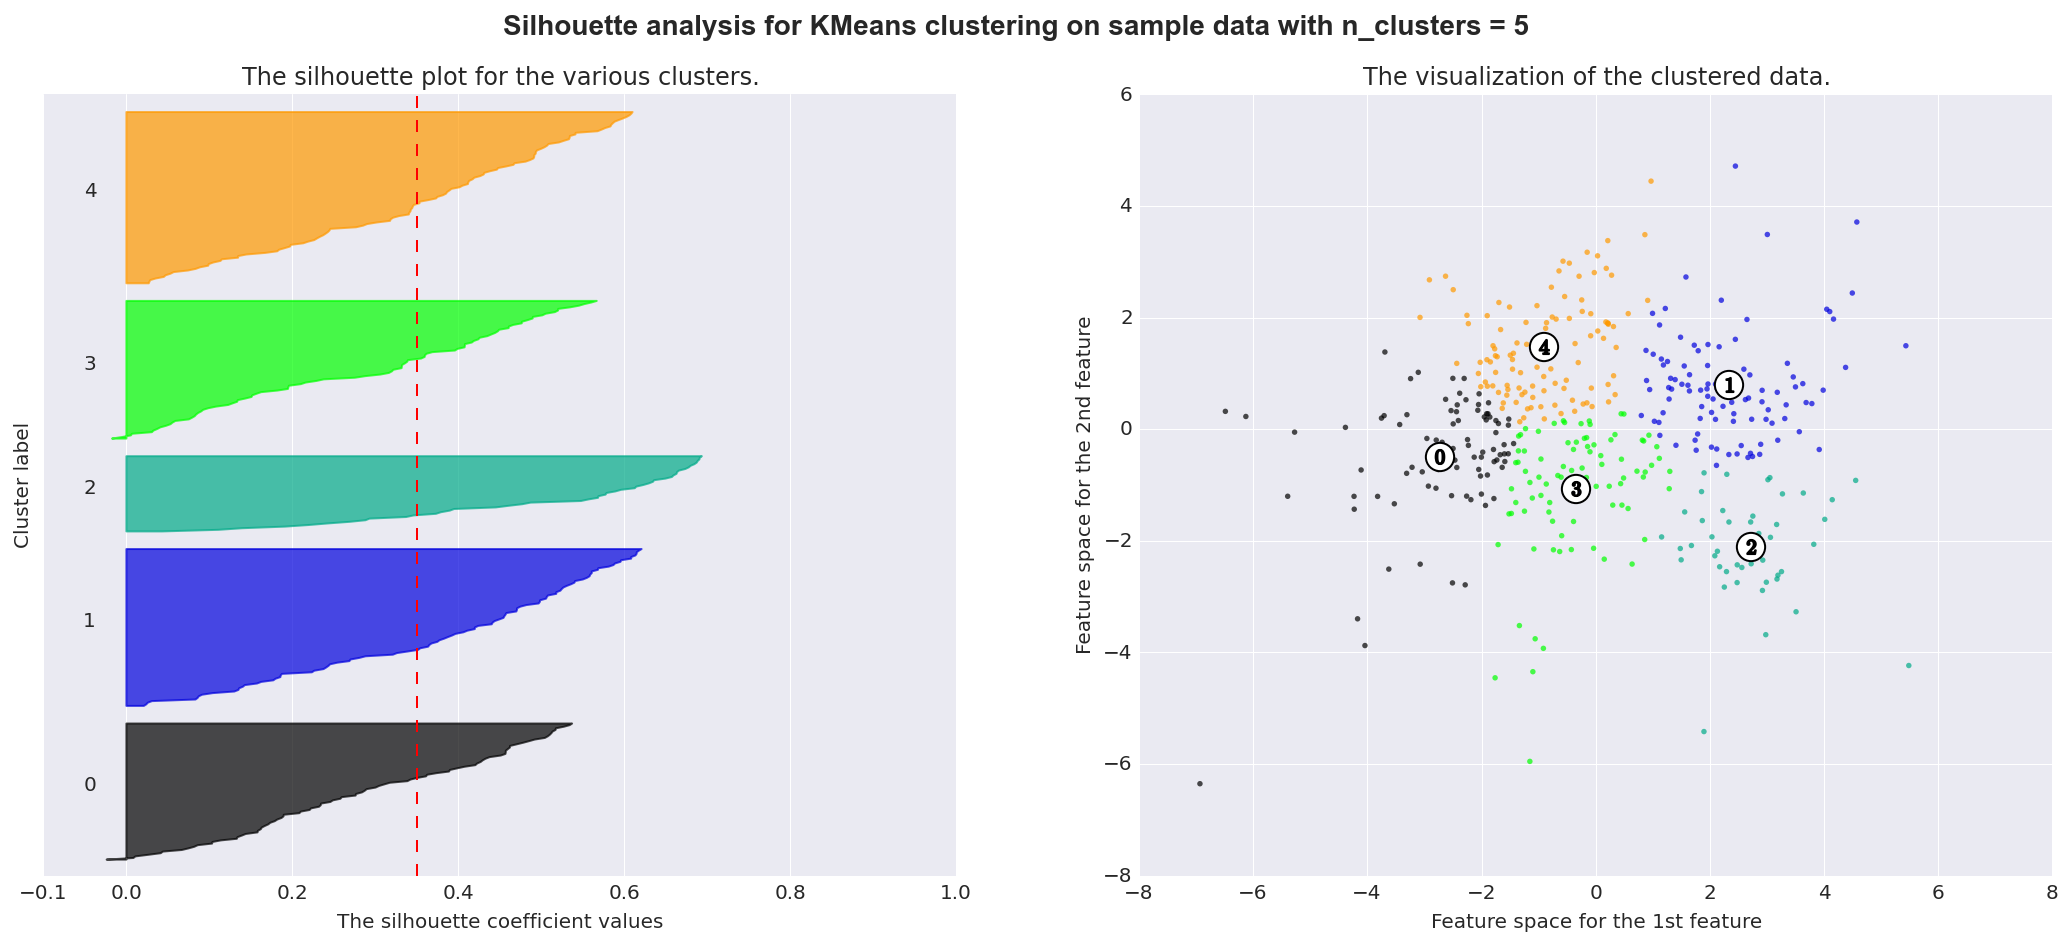

('For n_clusters =', 6, 'The average silhouette_score is :', 0.36336995837418989)


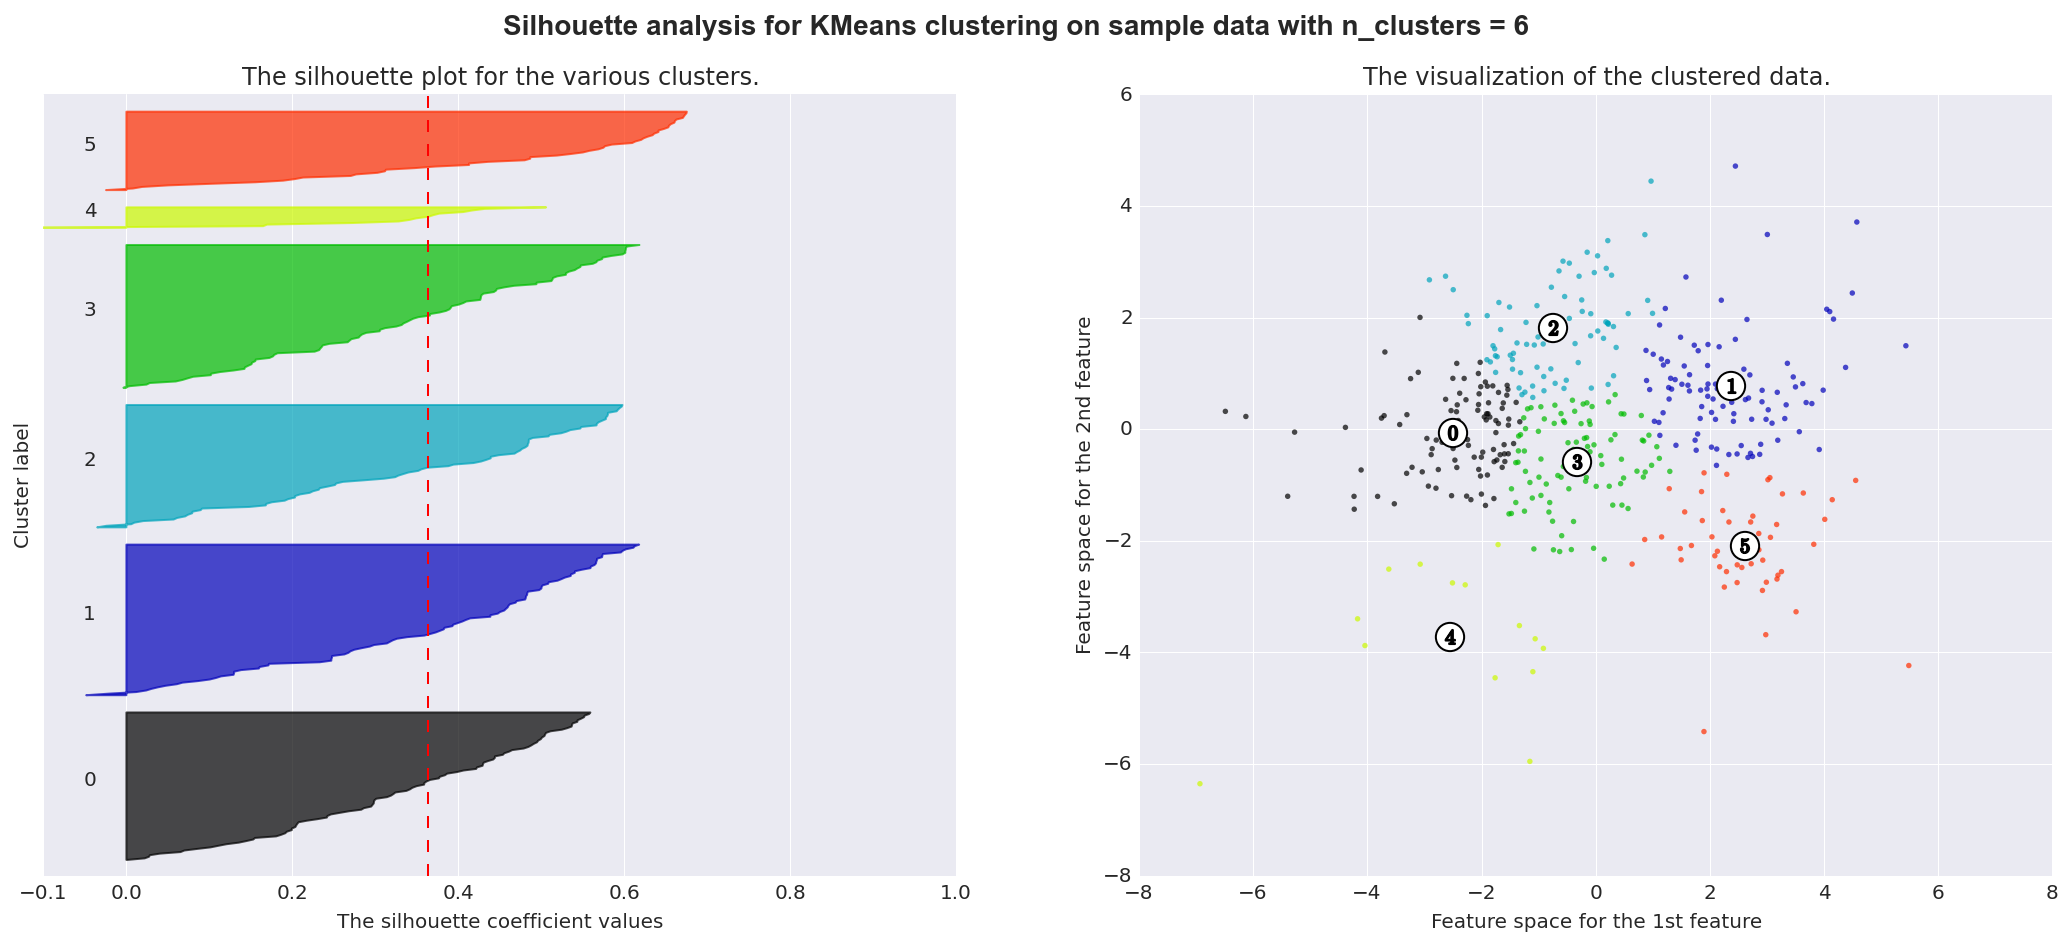

In [26]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
X = np.array(reduced_data)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # We use [-0.1, 1] to make positive silhouette values more visible
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=20160619)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    cluster_centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(cluster_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

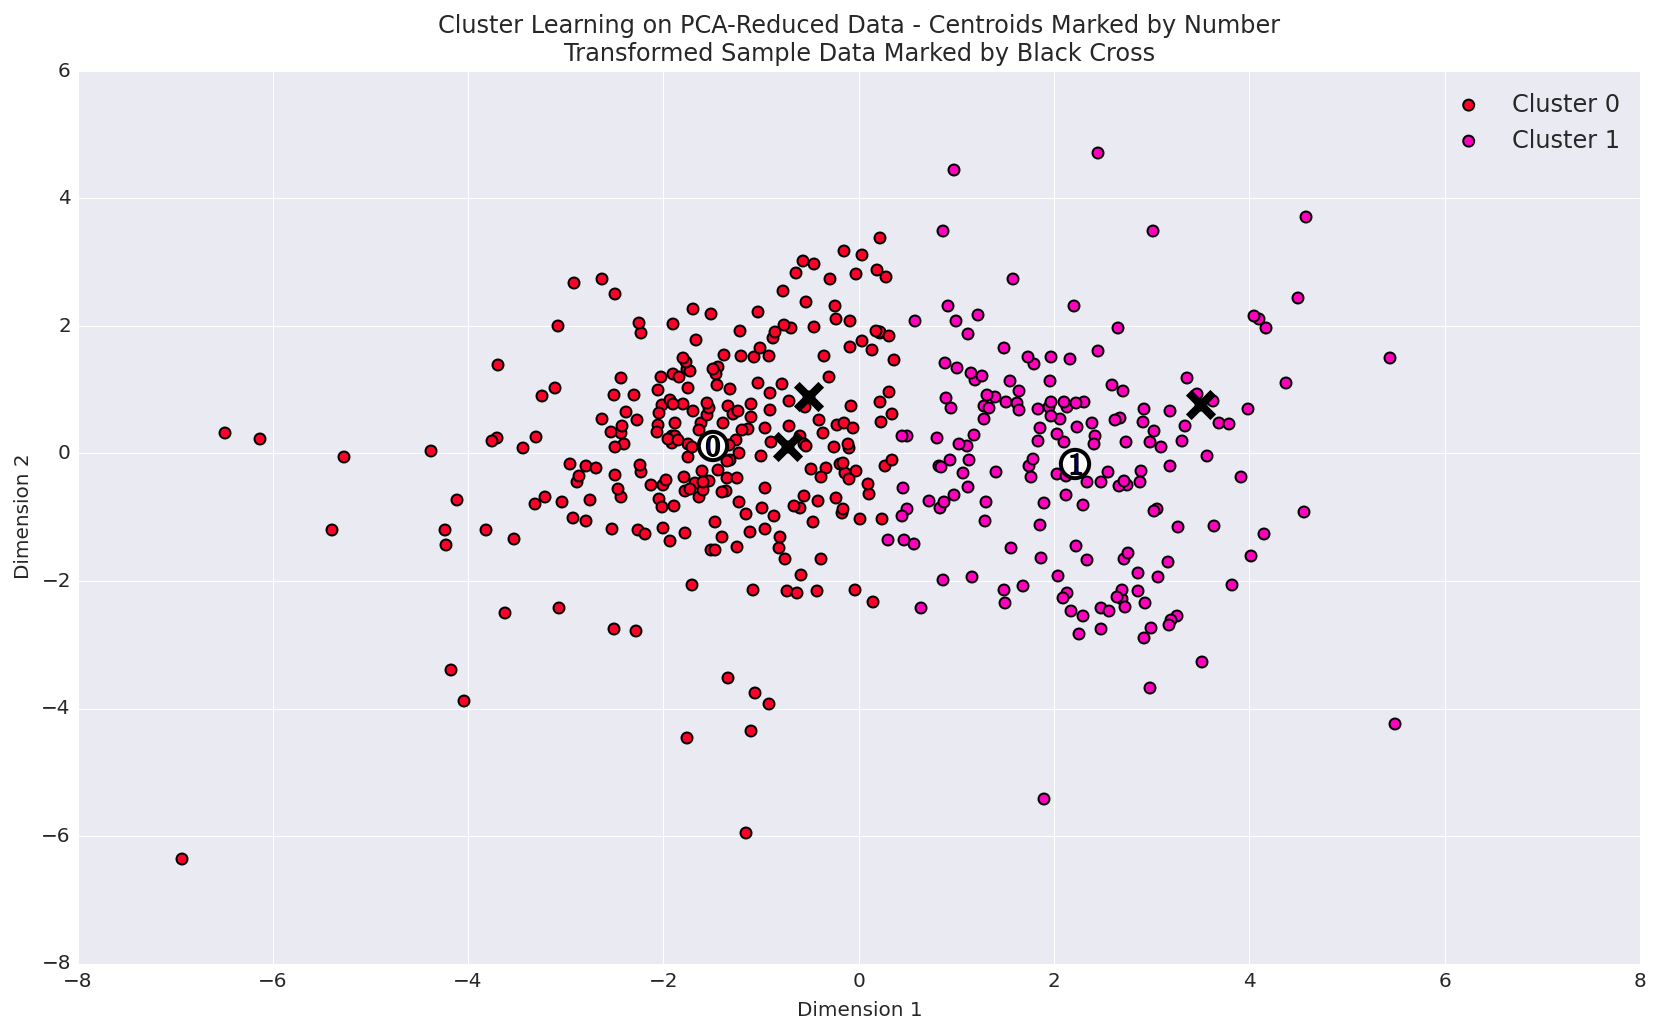

In [27]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [28]:
# DONE: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# DONE: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8872.0,1833.0,2389.0,1993.0,297.0,676.0
Segment 1,4564.0,8215.0,12310.0,969.0,4713.0,1118.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

We can try to characterize the segments by comparing their centers to some basic average metric of the initial dataset. Mean and median are good examples of such a basic metric. By comparing each category to its mean or median, we can spot differences in segments.

First, I substract mean and median vectors from the centers:

In [29]:
print "Segment centers in relation to the global mean:"
display(np.round(true_centers - data.mean()))

print "Segment centers in relation to the median:"
display(np.round(true_centers - data.median()))

Segment centers in relation to the global mean:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3128.0,-3963.0,-5562.0,-1079.0,-2584.0,-849.0
Segment 1,-7436.0,2419.0,4359.0,-2103.0,1832.0,-407.0


Segment centers in relation to the median:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,368.0,-1794.0,-2366.0,467.0,-520.0,-290.0
Segment 1,-3940.0,4588.0,7554.0,-557.0,3896.0,152.0


If we recall the basic statistics from the Data Exploration part, we may see that the data is skewed, standard deviation is very large. This can result in `mean` distortion. Median should be more tolerant to such problems, so let's use it for our analysis.

To visualize our comparison even further, we can plot a histogram of each category and place both segment centers _and_ category median on the chart. Thus we can analyze both segments and understand what companies they may represent.

In [30]:
# Let's read the original dataset and remove outliers as we did earlier
dataset = pd.read_csv("customers.csv")
comparable_dataset = dataset.drop(dataset.index[outliers]).reset_index(drop = True)

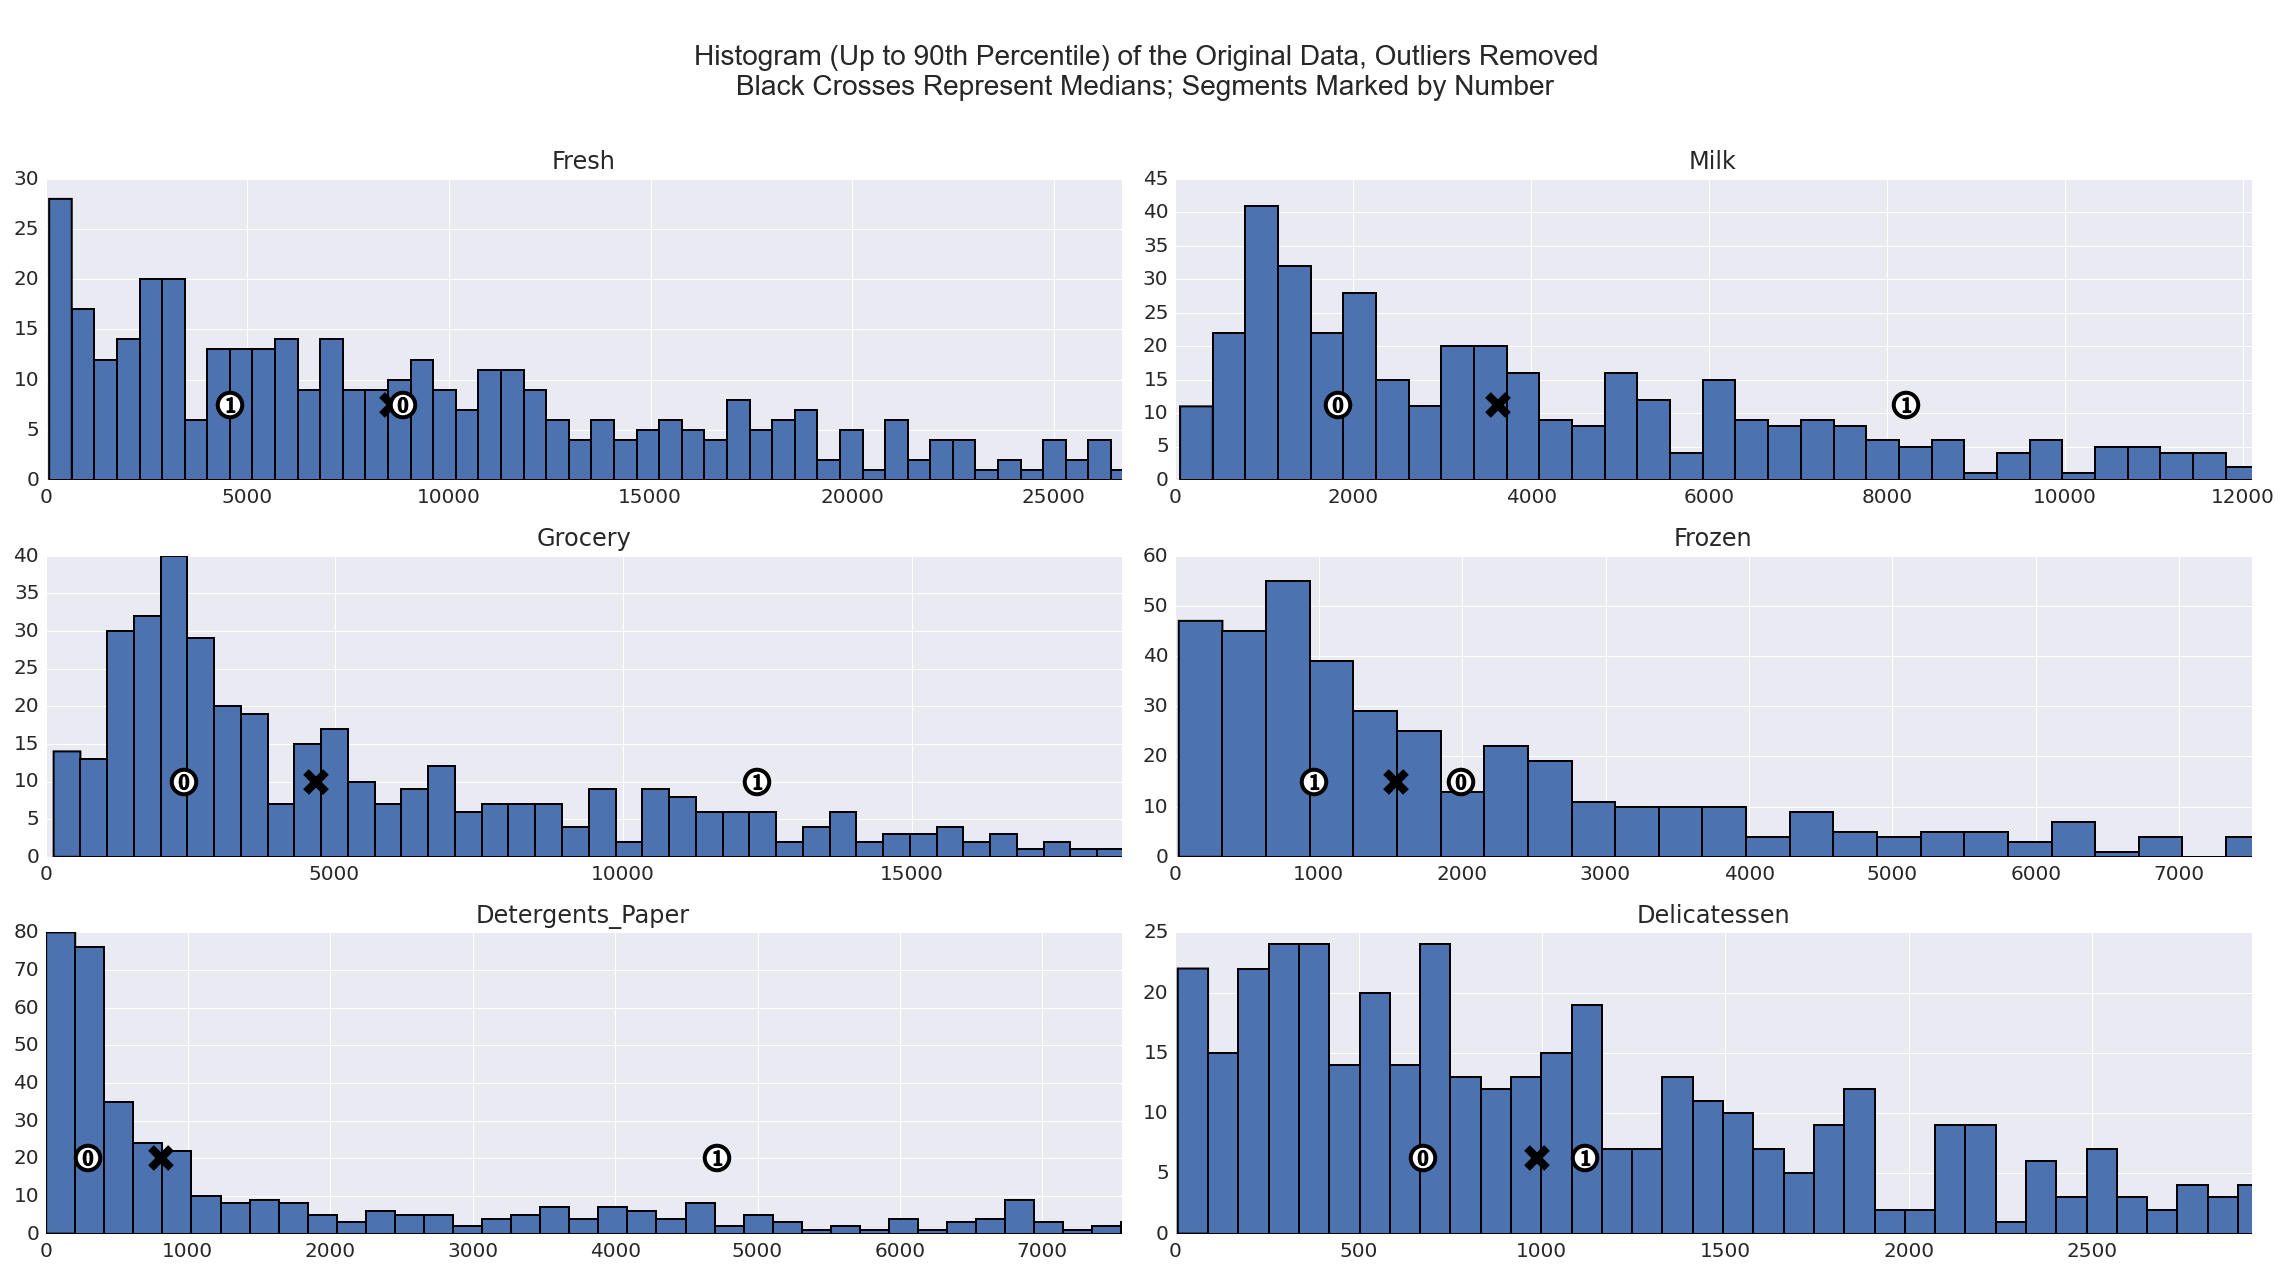

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,8))
suptitle = """
Histogram (Up to 90th Percentile) of the Original Data, Outliers Removed
Black Crosses Represent Medians; Segments Marked by Number
"""
plt.suptitle(suptitle, fontsize=14, y=1.1)
for ax, item in zip(axes.flat, list(data.keys())):
    hist_limit = np.percentile(comparable_dataset[item], 90)
    ax.hist(comparable_dataset[item], bins=200)
    y_max = ax.get_ylim()[1]
    ax.set_xlim(0, hist_limit)
    ax.set_ylim(0,y_max)
    ax.scatter(x=comparable_dataset[item].median(), y=y_max/4, s=100, 
               color='black', marker='x',linewidth = 4, zorder=5)
    ax.set_title(item)
    for i, c in enumerate(true_centers[item]):
        ax.scatter(x = c, y = y_max/4, color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=150, zorder=10)
        ax.scatter(x = c, y = y_max/4, marker='$%d$'%(i), alpha = 1, s=50, zorder=10)
        
plt.tight_layout()
plt.show()

From these charts we see the following:

* **Segment 0:** values of `Fresh` and `Frozen` are above the median (average). Values of `Grocery`, `Detegents_Paper` and `Milk` are below the average. Though `Delicatessen` is below the average, it's not that far away from the Segment 1's value. 

* **Segment 1:** values of `Milk`, `Grocery`, `Detergents_Paper` and `Delicatessen` are above the average, moreover, `Detergents_Paper` and `Grocery` values are very distant from the average and from the Segment 0's values.

As we see, Segment 0 companies purchase more `Fresh` and `Frozen` items. Also, they don't purchase any significant amounts of `Detergents_Paper`,`Grocery` and `Milk` (in contrast, Segment 1 companies do).

**The most distinctive feature is that Segment 1 companies buy much more `Grocery`, `Detergents_Paper` and `Milk`** (comparing to median values and Segment 0). These items require little special storage conditions and have a longer shelf life. I'd also say that PC1 in PCA may have captured this relation and this feature quite reliably describes the meaning of PC1.

**A noticable difference between Segment 0 and Segment 1 is the amount of perishable (or refrigerated) items they purchase.** Segment 0 companies require a *relatively* large amounts of fresh goods which have to be replenished frequently. The same holds for frozen items: they can be stored, but require special conditions or refrigerators.

We may state that Segment 0 represents HoReCa industry while Segment 1 is closer to Retail business.

This conforms to our earlier observation (in Question 5) regarding the meaning of `Dimension 1` (PC):

> If the value of this PC is high, the customer it may represent is either a retail store or a warehouse facility, or an another reseller.

Segment 0 can be described as the one with a small (or negative) value of PC1. Segment 1 is the one with some high value of PC1.

**This leads us to the following considerations:**

- Cluster 0 represents a Whole Foods type of supermarkets (organic, fresh and perishable items) and HoReCa businesses. Delivery time and frequency are critical for these companies.

- Cluster 1 represents warehouses or large retail networks. They don't usually require special refrigeration facilities or need special/frequent delivery schemes.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [32]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

To understand these predictions, let's substact a median vector from each of the samples:

In [33]:
display(samples - data.median())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,34584.0,-1527.0,-2146.5,-326.0,290.5,-142.5
1,-6378.0,-338.0,-1474.5,9.0,-581.5,3399.5
2,1255.0,21444.0,12889.5,-398.0,11591.5,659.5


* **Sample 0**: we see a very large positive amount of `Fresh`, some `Detergents_Paper` and a bit lower than a median value of `Delicatessen`. Also, we see a substantial negative values of `Milk`, `Grocery`. On the PCA transformed scatter plot this point will be placed on the left side of the plot. This is the place for HoReCa companies, but the extremely high values of `Fresh` made me think this was a kind of a blend of HoReCa and Retail segments. This can be an organic healthy food supermarket, the one which features high quality fresh food. This is consistent with my previous observations and with the predictions above. This is a sample from Segment 0.

* **Sample 1:** we see positive (above the median) values of `Frozen` and large positive values of `Delicatessen`. Also, `Fresh` amount is very negative as well as `Grocery`. We conclulde that this customer specialization is to sell frozen deli. A good example of this can be a seafood restaurant which does not include much of `Fresh` items in its menu. This could also be a seafood market (again, little `Fresh` and `Grocery`). As we previously discussed, `Grocery`, `Milk` and `Detergents_Paper` combined can be viewed as PC1. Here we see negative numbers in all of the three categories. That's another reason I think this sample represents a data point from Segment 0.

* **Sample 2:** this is easy. We see very large positive values of `Milk`, `Grocery` and `Detergents_Paper`. Although the value of `Fresh` is positive (but `Frozen` is negative anyway), the influence of those three categories is unquestionable. In our PC1-PC2 plot this data point should be placed a lot to the right from the center. This should be a Segment 1 company.

All of our predictions above seem to make sense and should be correct.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

An easy answer is that we need to run an A/B test on companies in Cluster 0 and compare the results. The choice of Cluster 0 companies as samples should be clear by now: they are most likely to be affected because their business needs perishable items and these items are to be delivered frequently. For now, we can ignore Cluster B: companies in this cluster are not dependent on regular/frequent deliveries of perishable items. To deliver every 3 days instead of 5 would be fine for them: they can store items without losing their value.

Here is for the **A/B test**. For group A we keep the delivery service 5 days a week, for group B we change it to 3 days a week. Our null hypothesis is this: *"Change in delivery service will not affect customer's satisfaction"*. We can then collect and compare feedback from B and A groups (say, we can ask them to rate the QoS from 1 to 5) and see if there is a difference.

To make this research more correct, we need to make sure **our result is valid and statistically significant**. To do so, we need to set the proper sample size. This can be achieved with the following steps:

- We need to set the confidence interval (statistical significance) to 0.05. This is a default level for most tests and it means that given a valid model, there is 5% chance of making type I (false positive) error.

- We need to make sure two sets (A and B) are drawn from the same distribution. To put it simple, we should pick a similar amount of restaurants, cafes and shops for A and B groups.

- To quickly find out the minimum sample size, we can use a [online calculator](http://www.evanmiller.org/ab-testing/sample-size.html). E.g, to see the baseline difference rate 30%, minimum detectable effect 20% with statistical power 80% and significance level 0.05, we need **85 samples**.

By running ```len(filter(lambda x: x == 0, preds))``` we see 256 samples in our set and changing delivery scheme for 85/256 (33% of the cluster) looks reasonable. Totally (A+B), we have to use 85 * 2 = 170 companies in this experiment.

To compare the results and prove they are significant, we can use a t-test: Student's t-test or Welch's t-test. I'd prefer Welch's test as it is included in ```scipy.stats``` module and works for sets with different variances.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

Let's begin with recalling the point of this analysis: what feature for each customer would we like to predict? 

There are two parts of this analysis. First, we need to understand what we are going to predict with these yet unkonwn  features. Second, when we keep in mind the end result, we can start thinking about the new features themselves. 

**Target variable**

The features which _can and should_ be derived from our dataset can be found after our clustering process. For example, it would be good to rank the sensibility of each company to the frequency of delivery. In other words, how likely the company will be affected if we change the delivery conditions. 

* *Easier job:* binary classification (0 - company will be negative about the new delivery schedule, 1 - positive or neutral).

* *Harder job*: multiclass classification (e.g., classes from 0 to 10; 0 - very negative about new schedule, 10 - very positive).

* *Even harder job:* predict the minimum amount of days between deliveries which keep our clients reasonably satisfied. This is a regression task.

To obtain our training set with this target, we can use the results of A/B testing from the previous question. Then we can use this data to predict the reaction for the rest of our customers.

**New features**

There are basically three ideas here:

1\. **Use latent features available after PCA and clustering**.

One of the features we can construct is the the cluster number which this sample belongs to. It may be useful to repeat clustering with GMM instead of K-means to acquire probabilities rather than the cluster numbers. To add more information to this new dataset, we can add PCA dimensions.

We get these:

* Cluster number (or probabilty of including into cluster 1)
* PC1
* PC2
* PC3 (three components should be enough to start with)

2\. **Construct more new features from our dataset** that can be helpful to our supervised algorithm.

* Company size. Larger retailers may require less frequent deliveries, larger HoReCa will probably need more frequent deliveries. Can be derived from the amount of goods purchased. Numeric, continuous value.

* Refrigeration. Percentage of purchased items that need refrigeration. Numeric, continuous value.

3\. (Optional) Finally, **we may ask business to provide more data on companies**. We see that we effectively categorized the two types of companies: retail and HoReCa. This may be an inssuficient level of detail and it may be a good idea to get some detailed data on these companies: 

* Type (hotel, restaurant, cafe, fast food, warehouse, supermarket, etc)

* Normalized delivery costs per delivery (if the costs are substantial, companies will more likely  accept the new delivery scheme).

To wrap it up, let's list all the new features we may consider:

If we are really adventurous:
```
cluster | PC1 | PC2 | PC3 | company_size | refrigeration_percentage | company_type | delivery_costs | delivery_frequency | customer_satisfaction (target)
```

We can also make our life easier and remove ```delivery_frequency``` and ```customer_satisfaction``` variables. In this case, our target will be a binary ```ok_with_new_delivery``` which predicts whether a customer accepts the new delivery scheme. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

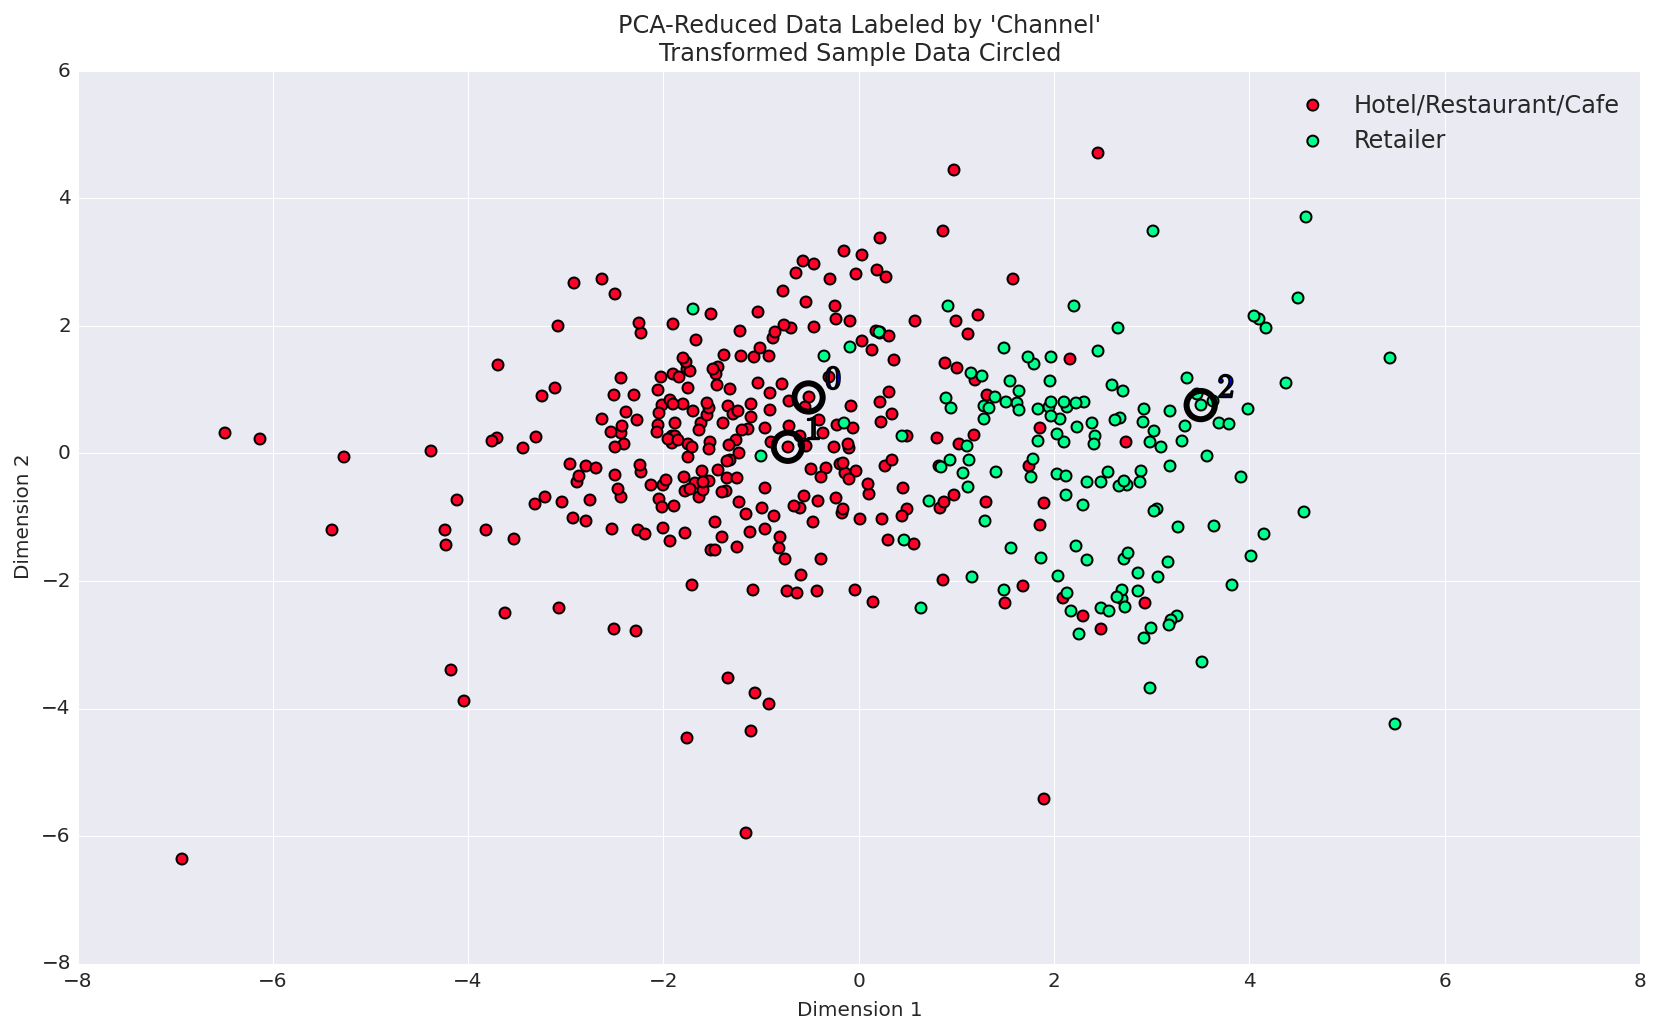

In [34]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

I'd say that the clustering algorithm (k-means) and the k value I've chosen, performed pretty well comparing to the real distribution of HoReCa and Retail customers. We can definitely compare the values of real clusters and the predicted ones to get the accuracy score, but this is a final check only procedure and it looks like overfitting on test set (for example, if we want to compare several clustering algorithms like k-means, spectral and GMM).

By the original distribution, the segments are _really_ HoReCa and Retail, this is described in the project [documentation](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers).

To be more specific on the quality of my clustering, I'd calculate F1 metric.

In [35]:
from sklearn.metrics import f1_score

# HoReCa and Retail segments are {1,2} in the original dataset, {0,1} in our clusters
comparable_dataset['Channel_Segment'] = comparable_dataset['Channel'].apply(lambda x: x-1)

y_true = np.array(comparable_dataset['Channel_Segment'])
y_pred = preds
f1_score(y_true, y_pred)

0.85161290322580641

We see that the score is 0.85, this is a very good score. We can conclude that the k-means algorithm indeed generalized the data well. There are several ways to improve the score:

* We can use GMM to tune the score.

* We can look at a totally different algorithm like T-SNE and do the whole analysis with T-SNE . This may give us better results, but it looks like an overengineering again.

**To wrap up, we've completed the analysis:**

1. We cleaned the dataset, transformed it to a fewer dimensions, clustered it and visualized the results. The clustering algorithm did well and found two clusters of data. 

2. Then we understood that the one cluster corresponds with HoReCa customers who require frequent deliveries of fresh items, the other one — with large Retail customers who can be comfortable with less frequent deliveries.

3. We decided on how to run A/B test, found the reasonable amount of customers to test on, described who these customers can be.

4. The results of this test can be used for the supervised algorithm which can help us predict the reaction of the other customers to this new delivery method.